# Understanding Business Case

### Business Case: Predicting House Prices
The dataset you provided contains various features related to housing characteristics, which likely represents a house price prediction problem. The goal is to use these features to predict the SalePrice of a house based on its attributes such as location, physical characteristics, condition, and other structural information.





# Domain Analysis
### MSSubClass (Building Class):

Represents the type of dwelling (e.g., 1-Story, 2-Story, Split-Level, etc.). Understanding the architectural style and purpose of a building helps evaluate its market appeal and cost.
### MSZoning (Zoning Classification):

Describes the residential or commercial zoning classification of the area. Properties in different zoning areas (e.g., residential vs. commercial) have varying regulations and value perceptions.
LotFrontage (Linear Feet of Street Connected to Property) & LotArea:

Larger lot sizes or frontage typically contribute positively to house prices, as they offer more space, especially in suburban areas.
### Street & Alley (Type of Access to Property):

The type of street or alley access (paved or gravel) can affect property convenience, resale value, and safety perceptions.
LotShape, LotConfig, LandContour, LandSlope:

These variables define the shape and physical terrain of the land. A well-configured, flat lot is generally more valuable because of ease of construction, landscaping, and usability.
### Neighborhood & Condition1/Condition2 (Proximity to Important Features):

Location is one of the strongest determinants of house prices. Desirable neighborhoods, proximity to parks, schools, or commercial areas can significantly raise a property's value.
### BldgType & HouseStyle:

The building type (e.g., detached, townhouse, duplex) and house style influence the target market and pricing. For example, a detached house may have more appeal and price premium in many markets.
### OverallQual (Overall Material and Finish Quality) & OverallCond:

These subjective ratings reflect the overall build quality and condition of the house. Better quality homes with durable materials and modern finishes are priced higher.
### YearBuilt & YearRemodAdd:

The construction year and the year of any major remodeling give insights into the house's age and modernization. Houses with recent renovations may have higher values.
### RoofStyle, RoofMatl, Exterior1st, Exterior2nd:

Roof and exterior materials contribute to both aesthetic appeal and durability. Some materials are premium and costlier, which will be reflected in the price.
### MasVnrType & MasVnrArea (Masonry Veneer Type/Area):

These features relate to the brick or stone veneer of the exterior, which can provide added structural integrity and visual appeal, often raising house prices.
### Foundation, BsmtQual, BsmtCond, BsmtFinType1/BsmtFinSF1:

Basement quality, condition, and finish type indicate the usability and livability of additional below-ground space. Finished basements typically increase a home’s value.
### Heating, HeatingQC, CentralAir:

The type of heating system and its quality (and whether the house has central air) affect energy efficiency and comfort, influencing the property’s value.
### GrLivArea (Above Grade Living Area):

One of the most critical predictors of house price. Larger living areas generally mean more space for occupants, driving up the price.
### Bathrooms & Bedrooms:

The number of full/half baths and bedrooms above ground is a key determinant of usability and family-friendliness, directly impacting the house's marketability.
### KitchenQual:

Kitchen quality plays a huge role in determining house price. Modern, high-end kitchens with good finishes are highly sought after.
### Fireplaces & GarageType:

Fireplaces and garages are considered desirable features. Houses with more fireplaces or garage space often fetch higher prices.
### GarageCars & GarageArea:

The size of the garage and the number of cars it can accommodate is often a key consideration for buyers, especially in suburban and rural markets.
### WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch:

Outdoor spaces such as decks and porches add value as they provide additional livable space and opportunities for relaxation and entertainment.
### PoolArea, PoolQC, Fence:

Pools and fencing are premium features. While pools may add value in certain climates, maintenance costs can offset some of that value in other regions.
### MiscFeature, MiscVal (Additional Features and Values):

Uncommon additional features (e.g., sheds, tennis courts) might provide added value depending on market demand.
### MoSold & YrSold (Month/Year of Sale):

Housing prices can fluctuate seasonally and over time. Selling in a seller’s market or in high-demand months (e.g., summer) can affect the price.
### SaleType & SaleCondition:

The type of sale (e.g., normal sale, auction, foreclosure) and its condition influence the final sale price. Distressed sales or foreclosures usually come at a discount.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Basic Checks:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
pd.set_option('display.max_column',None)

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [16]:
for i in df:
    print(i,':',df[i].unique())

Id : [   1    2    3 ... 1458 1459 1460]
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea : [ 8450  9600 11250 ... 17217 13175  9717]
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'F

In [17]:
df.drop('Id', axis=1,inplace=True)

# EDA:

In [18]:

list_cat=[]
for i in df:
    if(len(df[i].unique())<=30):
        list_cat.append(i)
print(list_cat)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [19]:
list_cat=df[list_cat]

In [20]:
type(list_cat)

pandas.core.frame.DataFrame

In [21]:
list_cont=[]
for i in df:
    if(len(df[i].unique())>=30):
        list_cont.append(i)
print(list_cont)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [22]:
list_cont=df[list_cont]

In [23]:
type(list_cont)

pandas.core.frame.DataFrame

## Univariate Analysis

In [24]:
list_cont.drop( 'SalePrice',inplace=True,axis=1)

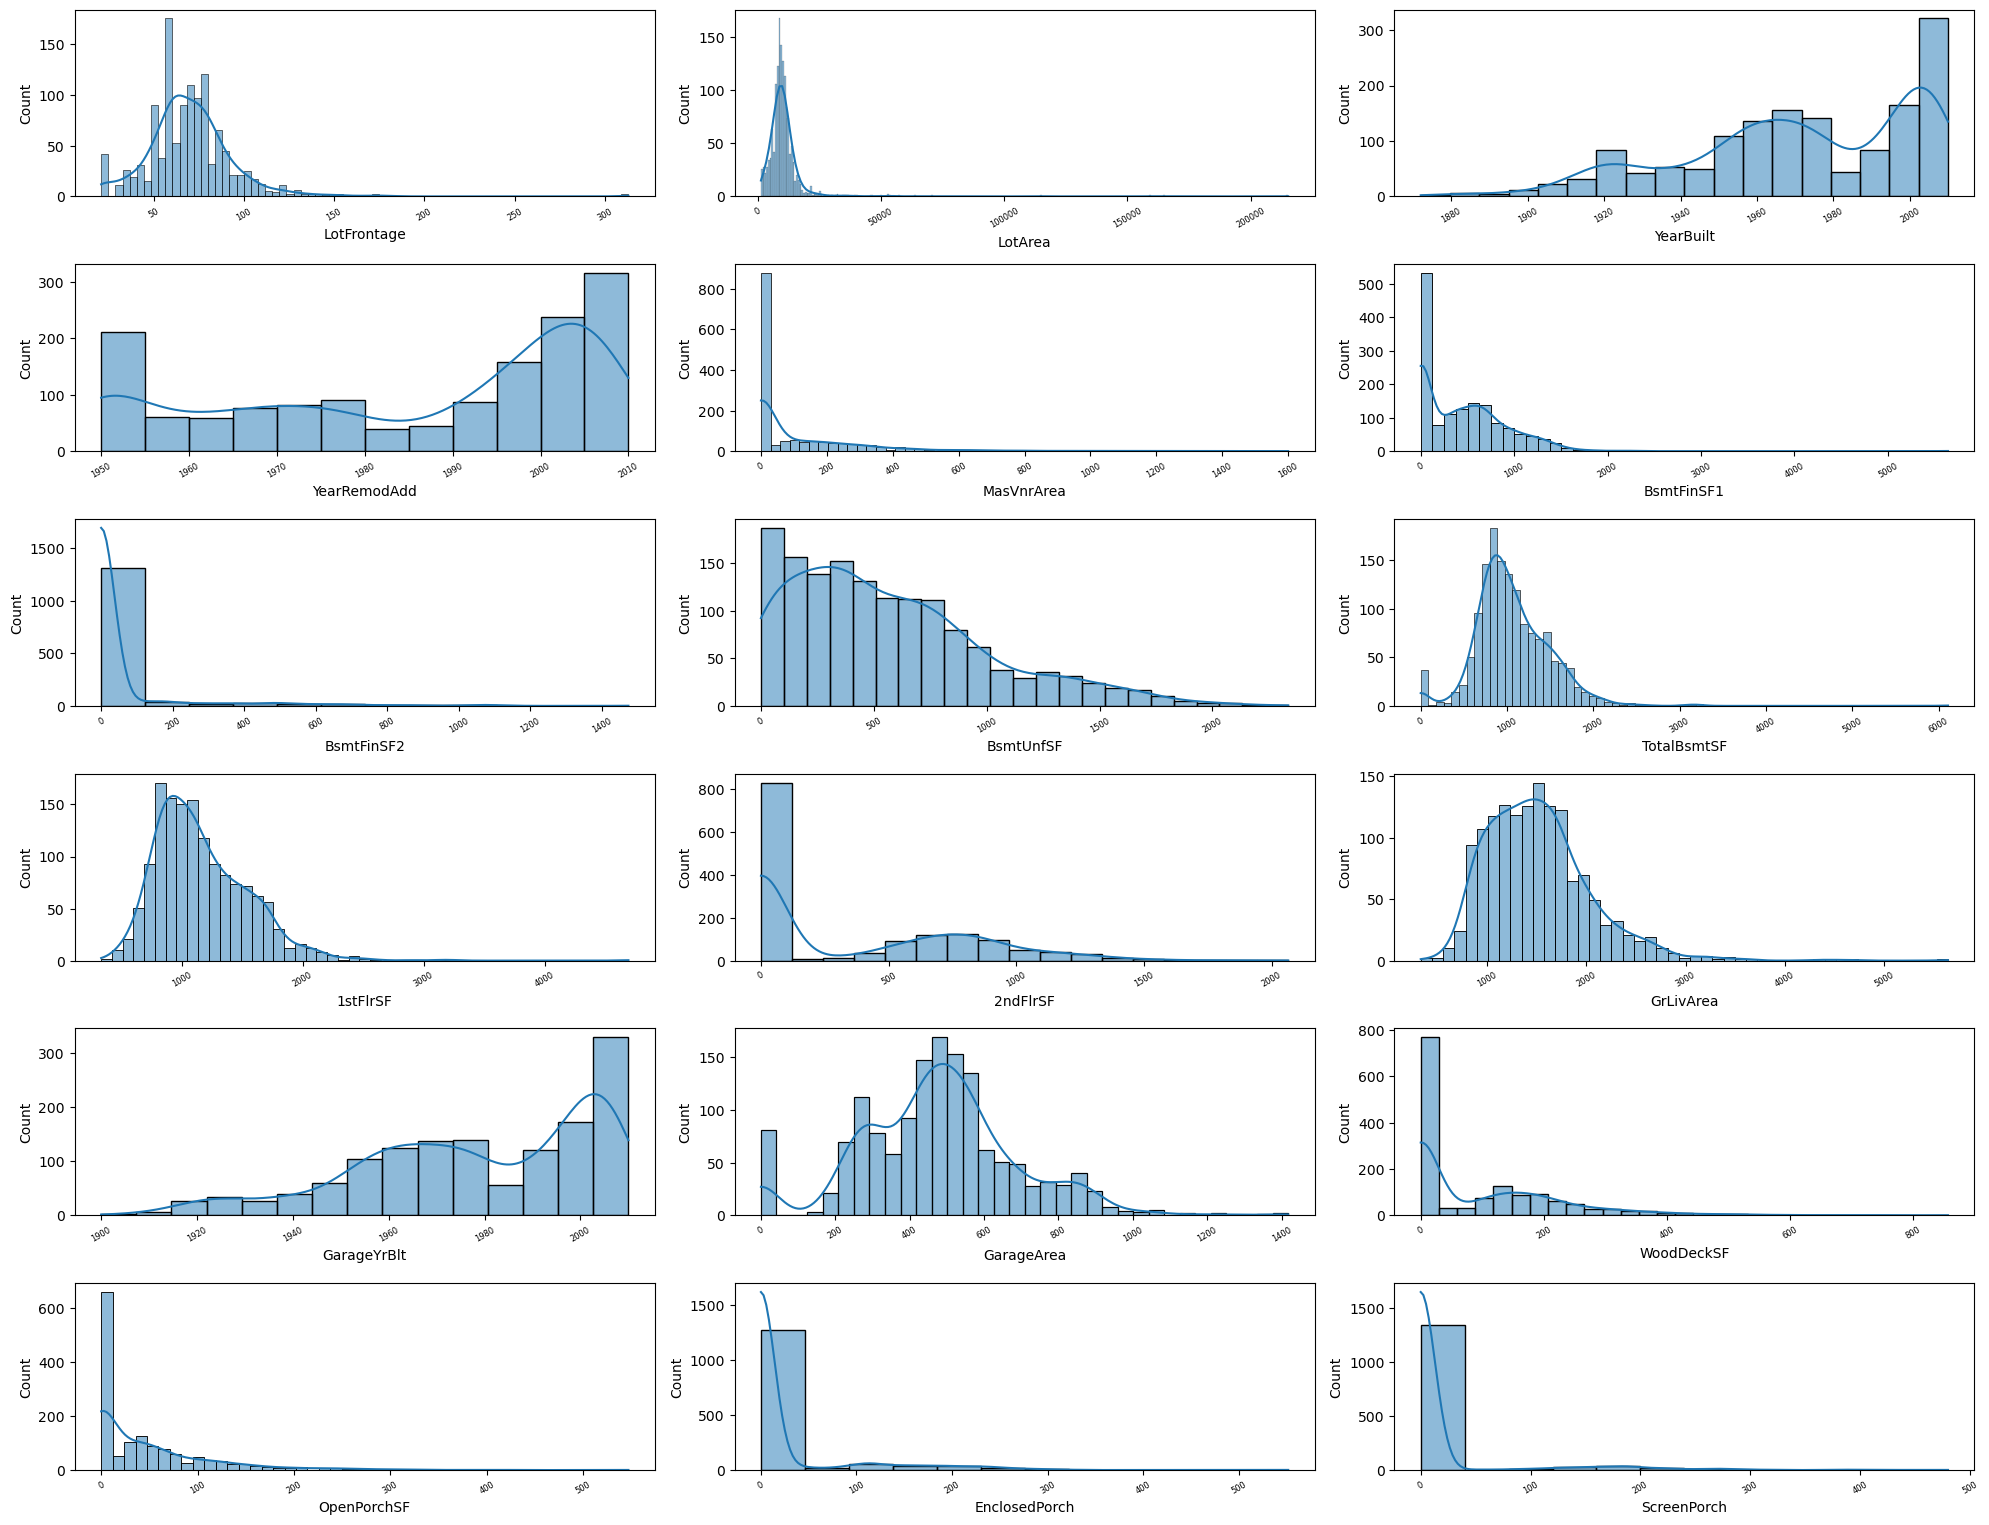

In [25]:
plt.figure(figsize=(20, 20))  # Set figure size
plotnumber = 1  # Initialize plot counter

for i in list_cont:  # Iterate over each continuous variable in the list
    plt.subplot(8, 3, plotnumber)  # Create a subplot in an 8x3 grid
    sns.histplot(x=list_cont[i], kde=True)  # Plot histogram with KDE
    plt.xticks(rotation=30, size=6)  # Rotate x-ticks for readability
    plotnumber += 1  # Increment plot number

plt.tight_layout()  # Ensure plots don't overlap
plt.show()  # Display the plots

# Insights:
### LotArea:

Homes with smaller lots (under 10,000 sqft) are more common in the $100k-$200k price range.
As the lot area increases, homes are more likely to fall into higher price categories, particularly those over 15,000 sqft, which are often associated with properties priced $300k+.
### OverallQual:

Higher overall quality (ratings 8 to 10) is predominantly linked to higher sale prices ($300k+).
Homes in the middle range of quality (5 to 7) are concentrated in the $100k-$300k range.
Lower quality homes (ratings 3-5) are more likely to fall into lower price brackets (below $200k).
### YearBuilt:

Older homes (pre-1950) are generally priced lower, falling in the $100k-$200k range.
Homes built after 2000 are more likely to be priced above $300k.
A noticeable shift occurs with homes built from the 1980s onward, showing a broader price range distribution, but mostly higher prices in newer homes.
### GrLivArea (Above-ground living area):

Smaller homes (under 1500 sqft) are predominantly in the $100k-$200k range.
Larger homes (over 2000 sqft) are more prevalent in higher price categories, with many falling in the $300k+ range.
Homes with over 2500 sqft are mostly priced above $300k.
### GarageArea:

Homes with smaller garage areas (less than 500 sqft) fall into lower price categories ($100k-$200k).
Larger garage areas (over 700 sqft) correlate with higher prices, especially homes priced above $300k.
### TotalBsmtSF (Total basement area):

Properties with smaller basement areas (under 1000 sqft) are concentrated in the lower price categories ($100k-$200k).
Larger basements (over 1500 sqft) are more common in homes priced above $300k.
### 1stFlrSF (First-floor square footage):

Homes with first-floor areas under 1500 sqft tend to be in lower price brackets.
Larger first-floor areas (over 2000 sqft) are associated with higher sale prices ($300k+).
### 2ndFlrSF (Second-floor square footage):

Homes with larger second floors (over 1000 sqft) tend to be in the $300k+ price range.
Smaller or no second floors are mostly associated with lower price categories ($100k-$200k).
### LotFrontage:

Smaller frontages (under 80 feet) are more common in lower-priced homes ($100k-$200k).
Larger lot frontages (100+ feet) are associated with higher-priced properties, though some exceptions exist.
### GarageCars:

Properties with larger garage capacity (3+ cars) are mostly priced in the $300k+ range.
Homes with garages that hold 1-2 cars tend to fall in the $100k-$300k price range.
### YearRemodAdd (Year of remodeling):
Homes remodeled before 1950 are generally in lower price categories ($100k-$200k).
Homes with more recent remodels (2000+) tend to be in higher price categories ($300k+).
### OverallCond:
Most homes fall within a condition rating of 5 to 6 and are distributed across various price categories, though higher overall condition ratings are associated with slightly higher sale prices.

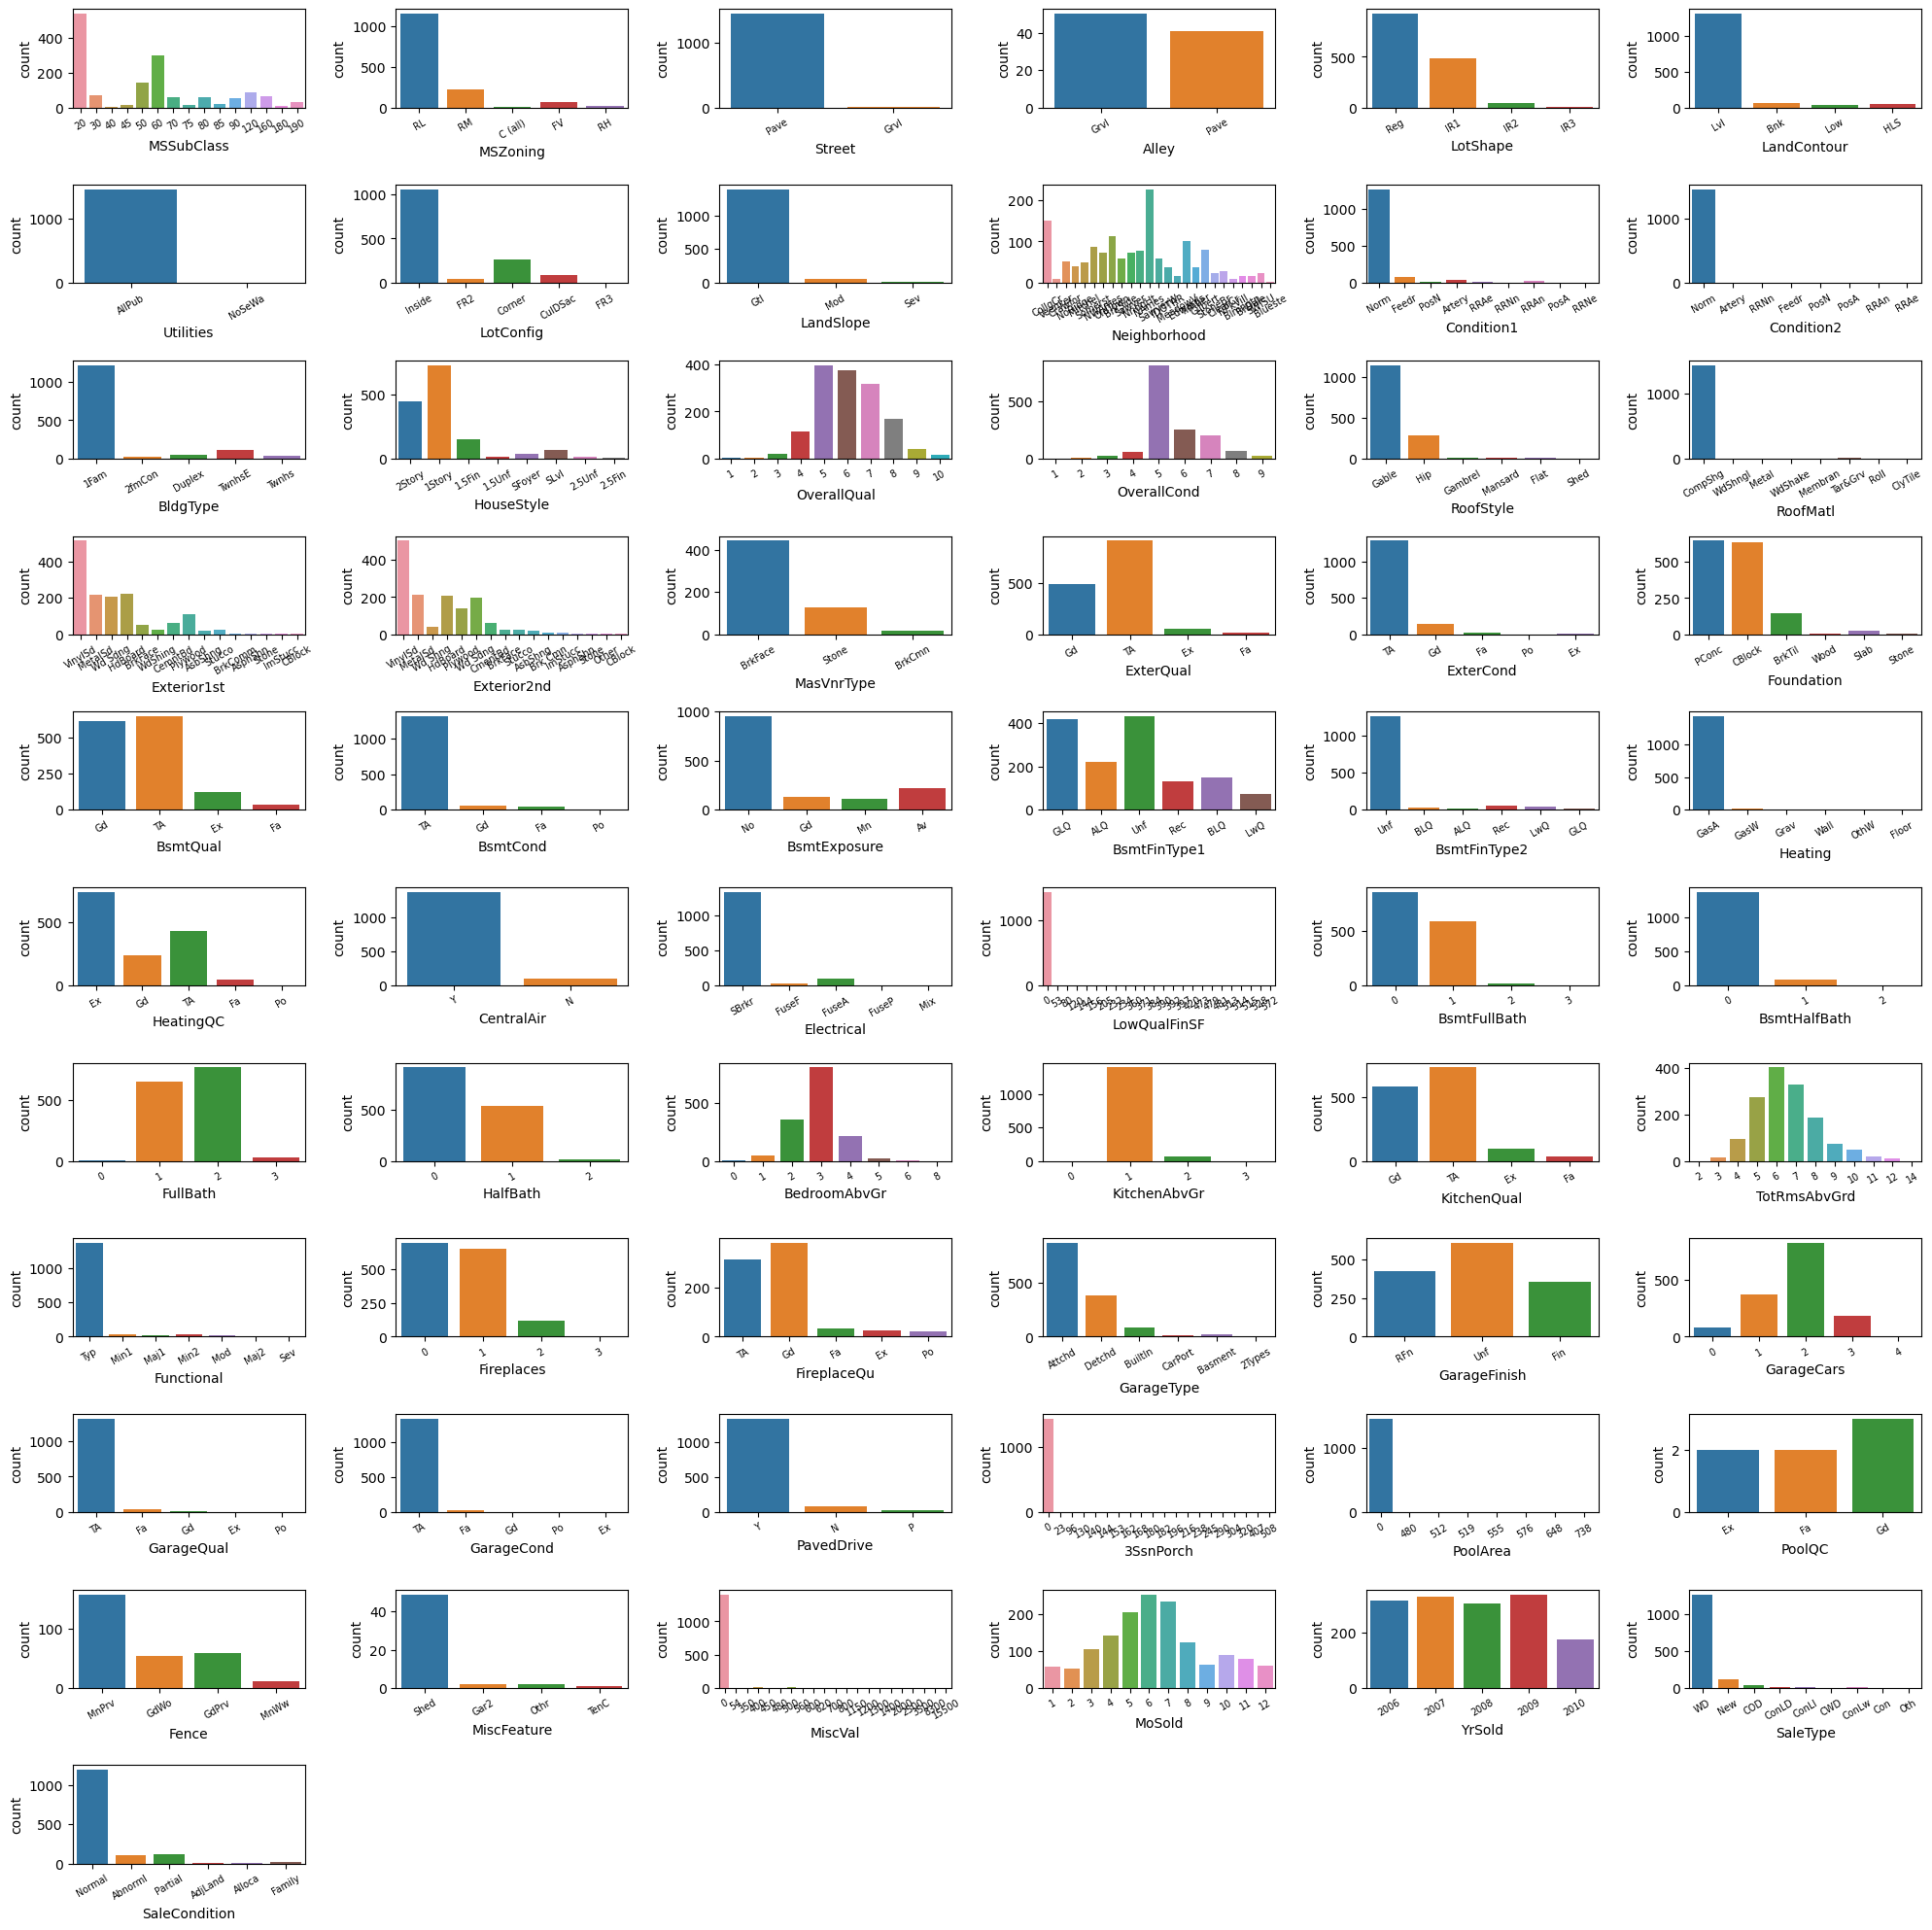

In [26]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(11,6,plotnumber)
    sns.countplot(x=list_cat[i])
    plt.xticks(rotation=30,size=7)
    plotnumber=plotnumber+1
plt.tight_layout()

# insights:
### MSZoning:

Properties in the RL (Residential Low Density) zone are spread across all price ranges, especially in the $100k-$300k range.
FV (Floating Village Residential) zone properties tend to be in the $300k+ price range.
### LotShape:

Regular lot shapes (Reg) are common across all price categories, especially in the $100k-$300k range.
Irregular lots (e.g., IR1) tend to be associated with higher-priced homes.
### BldgType:

Single-family detached homes (1Fam) are spread across all price categories, with higher-priced homes mostly being detached houses.
Duplexes and other building types are mostly in the lower price ranges ($100k-$200k).
### Neighborhood:

Some neighborhoods, such as NoRidge and NridgHt, are dominated by higher-priced properties ($300k+).
Lower-priced homes ($100k-$200k) are common in neighborhoods like MeadowV and IDOTRR.
### HouseStyle:

1Story and 2Story houses span all price ranges, but higher prices are more common with 2Story homes.
Other styles like 1.5Fin are mainly in the lower price categories.
### Foundation:

Homes with PConc (poured concrete) foundations tend to be in higher price categories ($300k+).
BrkTil and CBlock foundations are more associated with lower-priced homes.
### Exterior1st:

Certain exterior finishes like VinylSd and HdBoard are common across all price categories.
Higher-priced homes often have finishes like Stone and Stucco.
### RoofStyle:

Most homes have Gable or Hip roofs, with Hip roofs more prevalent in higher price ranges.
Flat and Mansard roofs are mainly found in lower-priced homes.
### ExterQual (Exterior material quality):

Homes with better exterior material quality (Ex and Gd) are generally in higher price categories.
Lower exterior quality homes (Fa) are mostly in the $100k-$200k range.
### HeatingQC (Heating quality and condition):

Homes with excellent heating quality (Ex) tend to be in higher price brackets ($300k+).
Homes with lower heating quality are mainly in the $100k-$200k range.
### CentralAir:

Homes with central air conditioning are spread across all price categories but dominate in the $200k+ range.
Homes without central air are more common in the lower price categories ($100k-$200k).
### SaleCondition:

Homes sold under normal conditions are distributed across all price categories.
Homes sold under more abnormal or forced-sale conditions tend to be in lower price categories.


# Bivariate Analysis:

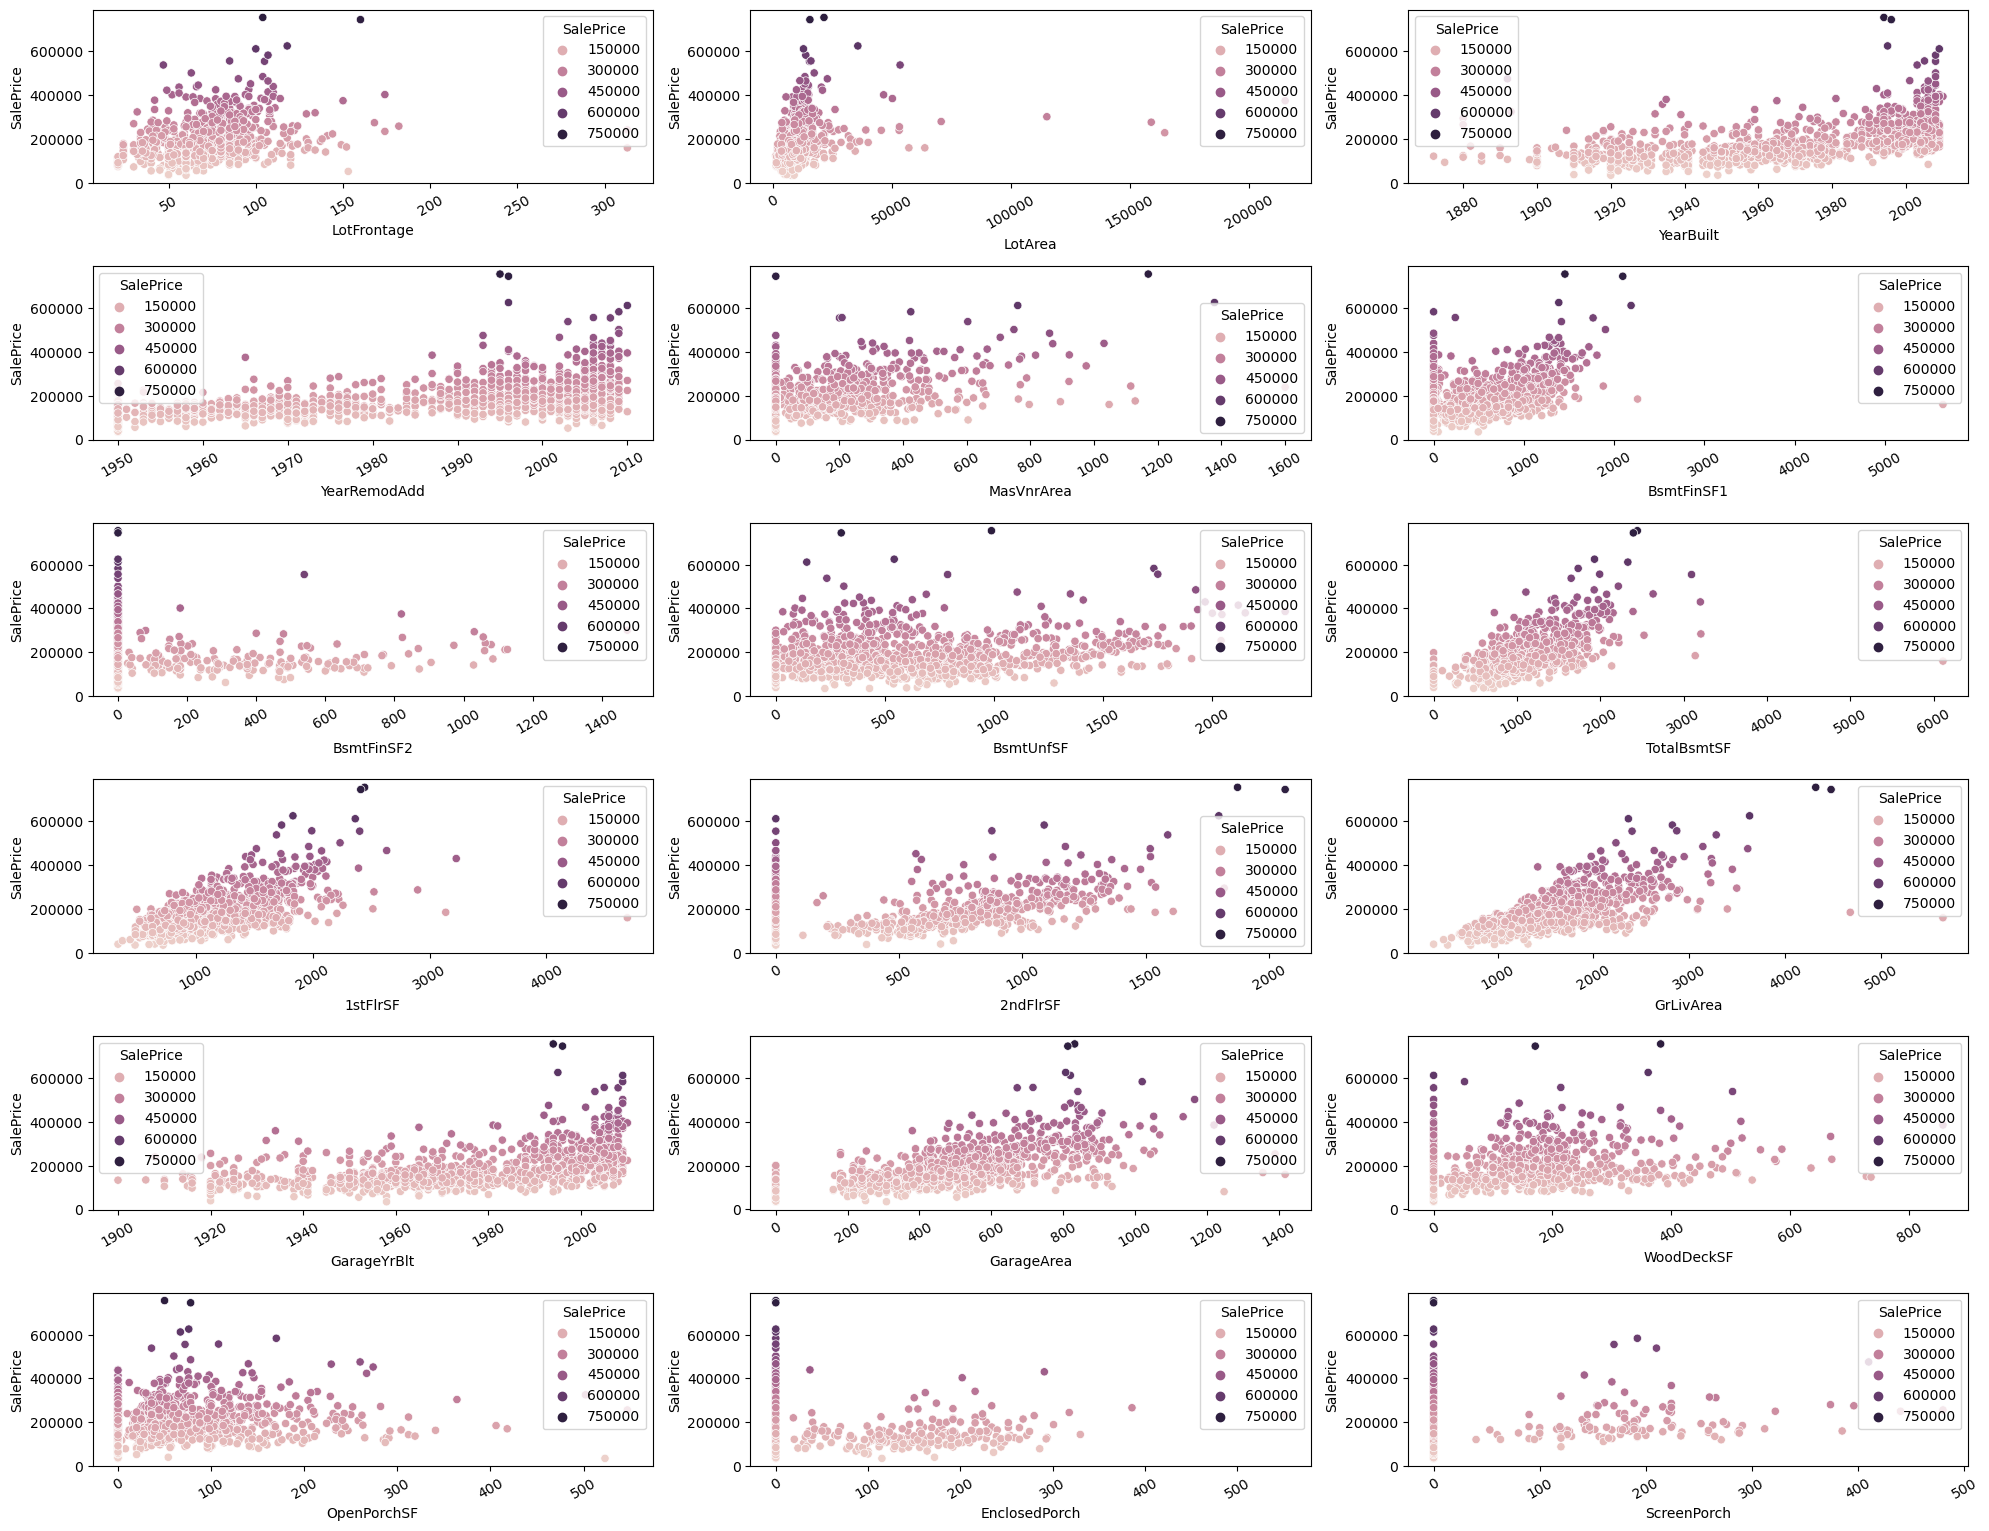

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cont:
    plt.subplot(8,3,plotnumber)
    sns.scatterplot(x=list_cont[i],y=df.SalePrice,hue=df.SalePrice)
    plt.xticks(rotation=30)
    plotnumber=plotnumber+1
plt.tight_layout()

# Insights:

### LotFrontage vs. SalePrice:

Slight positive correlation. Homes with wider frontages tend to have slightly higher sale prices, but the relationship is weak.
### LotArea vs. SalePrice:

A stronger positive correlation. Larger lots tend to sell for more, but there are significant outliers.
### OverallQual vs. SalePrice:

A clear linear positive relationship. Higher quality houses (as rated by Overall Quality) sell for substantially higher prices.
### OverallCond vs. SalePrice:

Condition does have a minor effect, but the trend is weaker compared to Overall Quality.
### YearBuilt vs. SalePrice:

Newer houses tend to fetch higher prices, though some older homes can still sell for high values due to other factors like renovations.
### YearRemodAdd vs. SalePrice:

Houses that have been remodeled recently show higher sale prices, indicating renovations play a significant role.
### MasVnrArea vs. SalePrice:

Homes with larger masonry veneer areas tend to sell for higher prices, though the correlation is weak.
### BsmtFinSF1 vs. SalePrice:

A moderate positive correlation. Finished basement area has a notable impact on house prices.
BsmtFinSF2 vs. SalePrice:

There is little correlation with SalePrice. This feature doesn’t seem to impact home prices as much.
### BsmtUnfSF vs. SalePrice:

Unfinished basement area shows a weak positive correlation with sale price, suggesting buyers may value potential expansion space.
### TotalBsmtSF vs. SalePrice:

Total basement square footage has a noticeable positive effect on sale prices, although less significant than above-ground living area.
### 1stFlrSF vs. SalePrice:

A strong positive correlation, similar to overall living area. Larger first-floor areas lead to higher prices.
### 2ndFlrSF vs. SalePrice:

Houses with larger second floors tend to sell for more, but this isn’t as common in all house styles.
### LowQualFinSF vs. SalePrice:

Very weak correlation. Low-quality finished areas don't impact prices significantly.
### GrLivArea vs. SalePrice:

One of the strongest positive correlations. Larger above-ground living areas are key in determining higher sale prices.
### BsmtFullBath vs. SalePrice:

More basement bathrooms generally mean higher prices, but the impact is moderate.
### BsmtHalfBath vs. SalePrice:

No noticeable trend. Basement half baths don’t seem to influence the sale price much.
### FullBath vs. SalePrice:

The number of full bathrooms is positively correlated with sale price, but the trend is less pronounced than some other features.
### HalfBath vs. SalePrice:

There’s a weak positive correlation with SalePrice, but additional half baths do not add as much value as full baths.
### BedroomAbvGr vs. SalePrice:

The number of bedrooms above ground shows a mild positive correlation with sale price, but it’s not a major factor.
### KitchenAbvGr vs. SalePrice:

Weak correlation. The number of kitchens doesn't significantly affect sale price.
### TotRmsAbvGrd vs. SalePrice:

More rooms above ground generally correspond to higher sale prices, but the correlation is weaker than for living area.
### Fireplaces vs. SalePrice:

Homes with more fireplaces tend to have higher sale prices, but the effect diminishes after a certain point.
### GarageYrBlt vs. SalePrice:

Newer garages correspond to higher sale prices, though not as strongly as the house construction year.
### GarageCars vs. SalePrice:

The number of garage spaces has a strong positive correlation with sale price, but after 3-4 cars, there’s diminishing value.
### GarageArea vs. SalePrice:

Larger garage areas lead to higher sale prices. This trend is consistent with the number of garage spaces.
### WoodDeckSF vs. SalePrice:

Homes with larger wood decks tend to sell for more, though the effect isn’t substantial.
### OpenPorchSF vs. SalePrice:

Open porch area shows a weak positive correlation with sale price, indicating it’s not a major price factor.
### EnclosedPorch vs. SalePrice:

Weak correlation. Enclosed porches don’t significantly affect sale prices.
### 3SsnPorch vs. SalePrice:

Rare occurrence in the dataset. Homes with three-season porches may sell for slightly higher prices, but the data is sparse.
### ScreenPorch vs. SalePrice:

Weak positive correlation. Homes with screen porches have slightly higher prices.
### PoolArea vs. SalePrice:

There are few homes with pools, but those that do tend to have higher sale prices.
### MiscVal vs. SalePrice:

Weak correlation. Miscellaneous values don’t seem to affect sale prices much.
### MoSold vs. SalePrice:

No clear trend between the month a house is sold and its sale price.
### YrSold vs. SalePrice:

Sale year has some impact, as prices may rise over time, but the trend isn’t strong within the timeframe of the data.
### MiscVal vs. SalePrice:

No clear correlation. Miscellaneous value doesn’t seem to significantly influence the sale price.
### LotConfig vs. SalePrice:

No clear trend.
Insights from Bar Plots (44 Categorical Columns):
### MSZoning vs. SalePrice:

Residential zones (RL, RM) generally have higher sale prices compared to others (C, FV).
### Street vs. SalePrice:

Homes on paved streets tend to sell for higher prices, but the difference is small

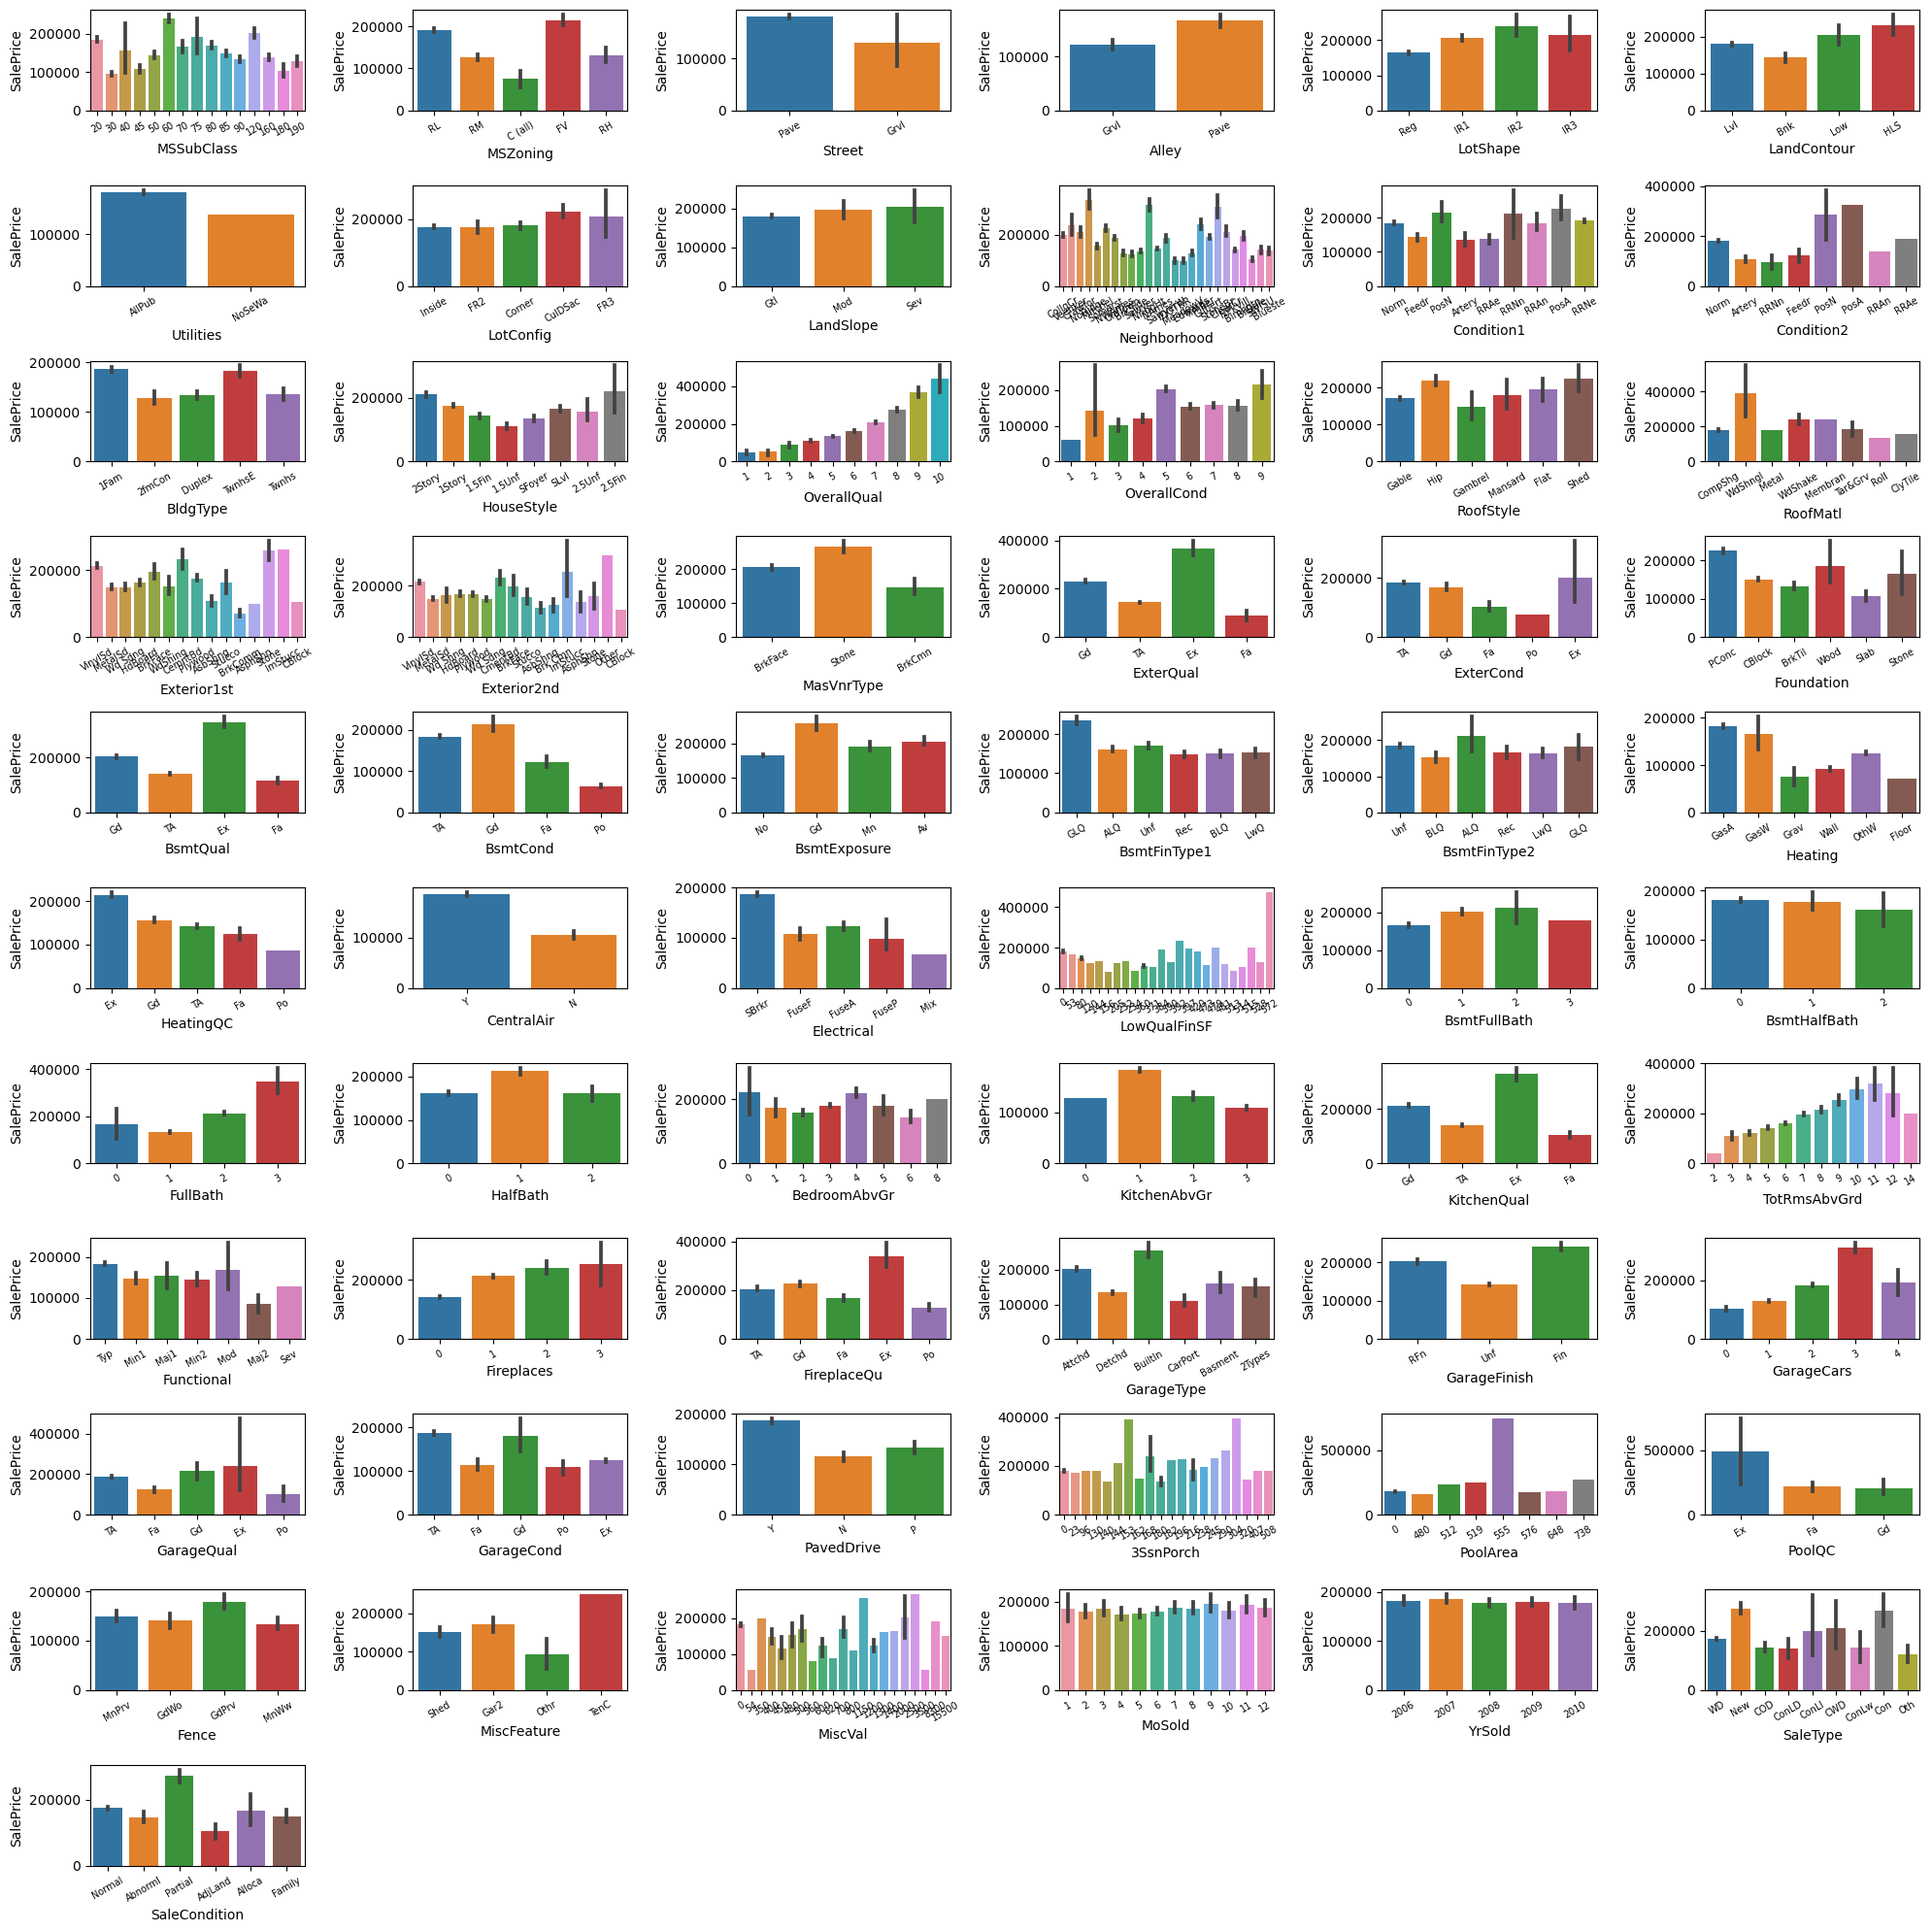

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(11,6,plotnumber)
    sns.barplot(x=list_cat[i],y=df.SalePrice)
    plt.xticks(rotation=30,size=7)
    plotnumber=plotnumber+1
plt.tight_layout()

# Insights:
### . MSZoning vs. SalePrice*:
   - *Insight*: Residential low-density (RL) and residential medium-density (RM) zones tend to have the highest sale prices. Commercial (C) and Floating Village (FV) zones have lower sale prices.
   - *Key Takeaway*: Zoning has a significant impact on house prices, with RL and RM zones attracting higher sale prices.

### . Street vs. SalePrice*:
   - *Insight*: Homes on paved streets (Pave) have higher sale prices compared to homes on gravel streets (Grvl).
   - *Key Takeaway*: Paved streets can marginally increase sale prices.

### . Alley vs. SalePrice*:
   - *Insight*: Houses with access to a paved alley (Pave) tend to have slightly higher sale prices than those with gravel alleys (Grvl), but many homes lack alley access entirely.
   - *Key Takeaway*: Alley access and its surface can affect sale price, though the impact is not substantial.

### . LotShape vs. SalePrice*:
   - *Insight*: Regular-shaped lots (Reg) tend to sell for higher prices compared to irregular lots (IR1, IR2, IR3).
   - *Key Takeaway*: Regular lot shapes provide slightly higher property value.

### . LandContour vs. SalePrice*:
   - *Insight*: Properties on level land (Lvl) tend to have higher sale prices, while those on steep slopes or undulating land (HLS, Low) have lower prices.
   - *Key Takeaway*: Flat land is more desirable for buyers, leading to higher property prices.

### . Utilities vs. SalePrice*:
   - *Insight*: Almost all homes in the dataset have all public utilities (AllPub), so there’s little variation.
   - *Key Takeaway*: Utility availability is important, but its impact on sale price is minimal due to the uniformity in this dataset.

### . LotConfig vs. SalePrice*:
   - *Insight*: Properties on cul-de-sacs (CulDSac) or frontage (FR2) tend to sell for slightly higher prices than those on normal inside lots.
   - *Key Takeaway*: Lot configuration can affect desirability and increase sale prices.

### . LandSlope vs. SalePrice*:
   - *Insight*: Homes on gentle slopes (Gtl) tend to sell for higher prices compared to moderate (Mod) or steep slopes (Sev).
   - *Key Takeaway*: A flat or gently sloped lot is more valuable than steep terrain.

### . Neighborhood vs. SalePrice*:
   - *Insight*: Neighborhoods such as NridgHt, NoRidge, and StoneBr command significantly higher sale prices, while neighborhoods like BrDale and MeadowV have lower sale prices.
   - *Key Takeaway*: Location is one of the most important factors influencing property value, with premium neighborhoods attracting higher prices.

### . Condition1 vs. SalePrice*:
   - *Insight*: Proximity to favorable conditions such as parks (PosN, PosA) or normal traffic flow (Norm) tends to increase house prices. Proximity to negative features like railroads (RRNn, RRAn) lowers prices.
   - *Key Takeaway*: Positive environmental conditions can significantly raise sale prices, while undesirable locations reduce them.

### . Condition2 vs. SalePrice*:
   - *Insight*: Similar to Condition1, homes near positive features (like parks or green spaces) tend to have higher sale prices.
   - *Key Takeaway*: Surrounding environmental features impact pricing similarly to Condition1.

### . BldgType vs. SalePrice*:
   - *Insight*: Single-family detached homes (1Fam) sell for the highest prices, while townhouses (TwnhsE, Twnhs) and duplexes (Duplex) tend to sell for lower prices.
   - *Key Takeaway*: Single-family homes are valued higher compared to multi-family units or townhouses.

### . HouseStyle vs. SalePrice*:
   - *Insight*: Two-story homes (2Story, 2.5Fin) tend to command the highest prices, while one-story or split-level homes sell for less.
   - *Key Takeaway*: Multi-story homes are generally seen as more desirable and thus sell for higher prices.

### *14. RoofStyle vs. SalePrice*:
   - *Insight*: Houses with gable roofs (Gable) are the most common and sell for slightly higher prices compared to those with hip roofs (Hip).
   - *Key Takeaway*: Roof style has a marginal effect on sale prices.

### . RoofMatl vs. SalePrice*:
   - *Insight*: Houses with high-quality roofing materials (CompShg) tend to sell for higher prices. Other materials such as Tar&Grv have lower sale prices.
   - *Key Takeaway*: Roofing materials can influence buyer perception and pricing.

### . Exterior1st vs. SalePrice*:
   - *Insight*: Exterior materials such as VinylSd and CemntBd correspond to higher sale prices, while materials like BrkComm are associated with lower prices.
   - *Key Takeaway*: The exterior material can significantly influence property value.

### . Exterior2nd vs. SalePrice*:
   - *Insight*: Similar to Exterior1st, materials like VinylSd result in higher sale prices, while others like Wd Sdng lower the price.
   - *Key Takeaway*: Consistent with Exterior1st, exterior material matters.

### . MasVnrType vs. SalePrice*:
   - *Insight*: Houses with stone (Stone) or brick veneer (BrkFace) tend to have higher sale prices than those without veneer (None).
   - *Key Takeaway*: Veneer type adds perceived value and increases sale prices.

### . ExterQual vs. SalePrice*:
   - *Insight*: Homes with excellent (Ex) or good (Gd) exterior quality sell for significantly higher prices than those with fair or poor quality (Fa, TA).
   - *Key Takeaway*: Exterior quality is a strong determinant of property value.

### . ExterCond vs. SalePrice*:
   - *Insight*: Homes with good exterior condition (Gd) fetch higher prices than those with poor or fair condition (Fa, Po).
   - *Key Takeaway*: External condition matters but is less critical than exterior quality.

### . Foundation vs. SalePrice*:
   - *Insight*: Houses with poured concrete (PConc) or cinder block (CBlock) foundations tend to sell for higher prices compared to those with stone or brick foundations.
   - *Key Takeaway*: Modern and stable foundations like poured concrete add value to homes.

### . BsmtQual vs. SalePrice*:
   - *Insight*: Houses with excellent (Ex) or good (Gd) basement quality sell for significantly higher prices than those with fair or poor basements (Fa, TA).
   - *Key Takeaway*: Basement quality is a key factor in determining sale price, as a high-quality basement adds functional space.

### . BsmtCond vs. SalePrice*:
   - *Insight*: Homes with good basement condition (Gd) fetch higher prices than those with fair or poor conditions.
   - *Key Takeaway*: Basement condition influences pricing but is less critical than basement quality.

### . BsmtExposure vs. SalePrice*:
   - *Insight*: Homes with good basement exposure (Gd, Av) tend to have higher sale prices.
   - *Key Takeaway*: A well-exposed basement adds value by bringing in natural light.

### . BsmtFinType1 vs. SalePrice*:
   - *Insight*: Finished basements with excellent (GLQ) or good quality (ALQ) significantly raise sale prices.
   - *Key Takeaway*: Finishing quality of the basement adds a significant amount to the home’s price.

### . BsmtFinType2 vs. SalePrice*:
   - *Insight*: The secondary basement finish type has less impact on sale price than the primary basement finish.
   - *Key Takeaway*: Secondary basement finish is not as critical as the main basement finish.

---

# Data Preprocessing

# Handling with Null values and corrupted values

In [29]:
list_null=[]
for i in df:
    if(df[i].isnull().sum()>0):
        list_null.append(i)
print(list_null)
        

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [30]:
list_null=df[list_null]

In [31]:
a=[]
b=[]
for i in list_null:
    if(list_null[i].dtype=='object'):
        a.append(i)
    else:
        b.append(i)

In [32]:
for i in a:
    print(i,df[i].value_counts())

Alley Alley
Grvl    50
Pave    41
Name: count, dtype: int64
MasVnrType MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
BsmtQual BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1 BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2 BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
Electrical Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
FireplaceQu FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
GarageType GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count

In [33]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [34]:
for i in df:
    if(i in b):
        df.loc[df[i].isnull(),i]=df[i].median()   

In [35]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [36]:
a=df[a]

In [37]:
dict_q={'Alley' :'Grvl',
 'MasVnrType':'BrkFace',                                          
 'BsmtQual':'TA',
 'BsmtCond':'TA',
 'BsmtExposure':'No',
 'BsmtFinType1':'Unf',
 'BsmtFinType2':'Unf',
 'Electrical':'SBrkr',
 'FireplaceQu':'GD',
 'GarageType':'Attched',
 'GarageFinish':'Unf',
 'GarageQual':'TA', 
 'GarageCond':'TA',
 'PoolQC':'Gd',
 'Fence':'MnPrv',
 'MiscFeature':'Shed'}
dict_q

{'Alley': 'Grvl',
 'MasVnrType': 'BrkFace',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Electrical': 'SBrkr',
 'FireplaceQu': 'GD',
 'GarageType': 'Attched',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA',
 'PoolQC': 'Gd',
 'Fence': 'MnPrv',
 'MiscFeature': 'Shed'}

In [38]:
for i in df:
    if(i in dict_q.keys()):
        for j in dict_q.keys():
            if(i == j):
                for k in dict_q.values():
                     df.loc[df[i].isnull(),i]=k

In [39]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Handling with Outliers

In [40]:
list_cont=list_cont.drop(['BsmtFinSF2','ScreenPorch','EnclosedPorch'],axis=1,)
list_cont

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,2003,2003,196.0,706,150,856,856,854,1710,2003.0,548,0,61
1,80.0,9600,1976,1976,0.0,978,284,1262,1262,0,1262,1976.0,460,298,0
2,68.0,11250,2001,2002,162.0,486,434,920,920,866,1786,2001.0,608,0,42
3,60.0,9550,1915,1970,0.0,216,540,756,961,756,1717,1998.0,642,0,35
4,84.0,14260,2000,2000,350.0,655,490,1145,1145,1053,2198,2000.0,836,192,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,953,953,953,694,1647,1999.0,460,0,40
1456,85.0,13175,1978,1988,119.0,790,589,1542,2073,0,2073,1978.0,500,349,0
1457,66.0,9042,1941,2006,0.0,275,877,1152,1188,1152,2340,1941.0,252,0,60
1458,68.0,9717,1950,1996,0.0,49,0,1078,1078,0,1078,1950.0,240,366,0


In [41]:
li_ze=df[['BsmtFinSF2','ScreenPorch','EnclosedPorch']]
li_ze

,BsmtFinSF2,ScreenPorch,EnclosedPorch
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,272
4,0,0,0
...,...,...,...
1455,0,0,0
1456,163,0,0
1457,0,0,0
1458,1029,0,112


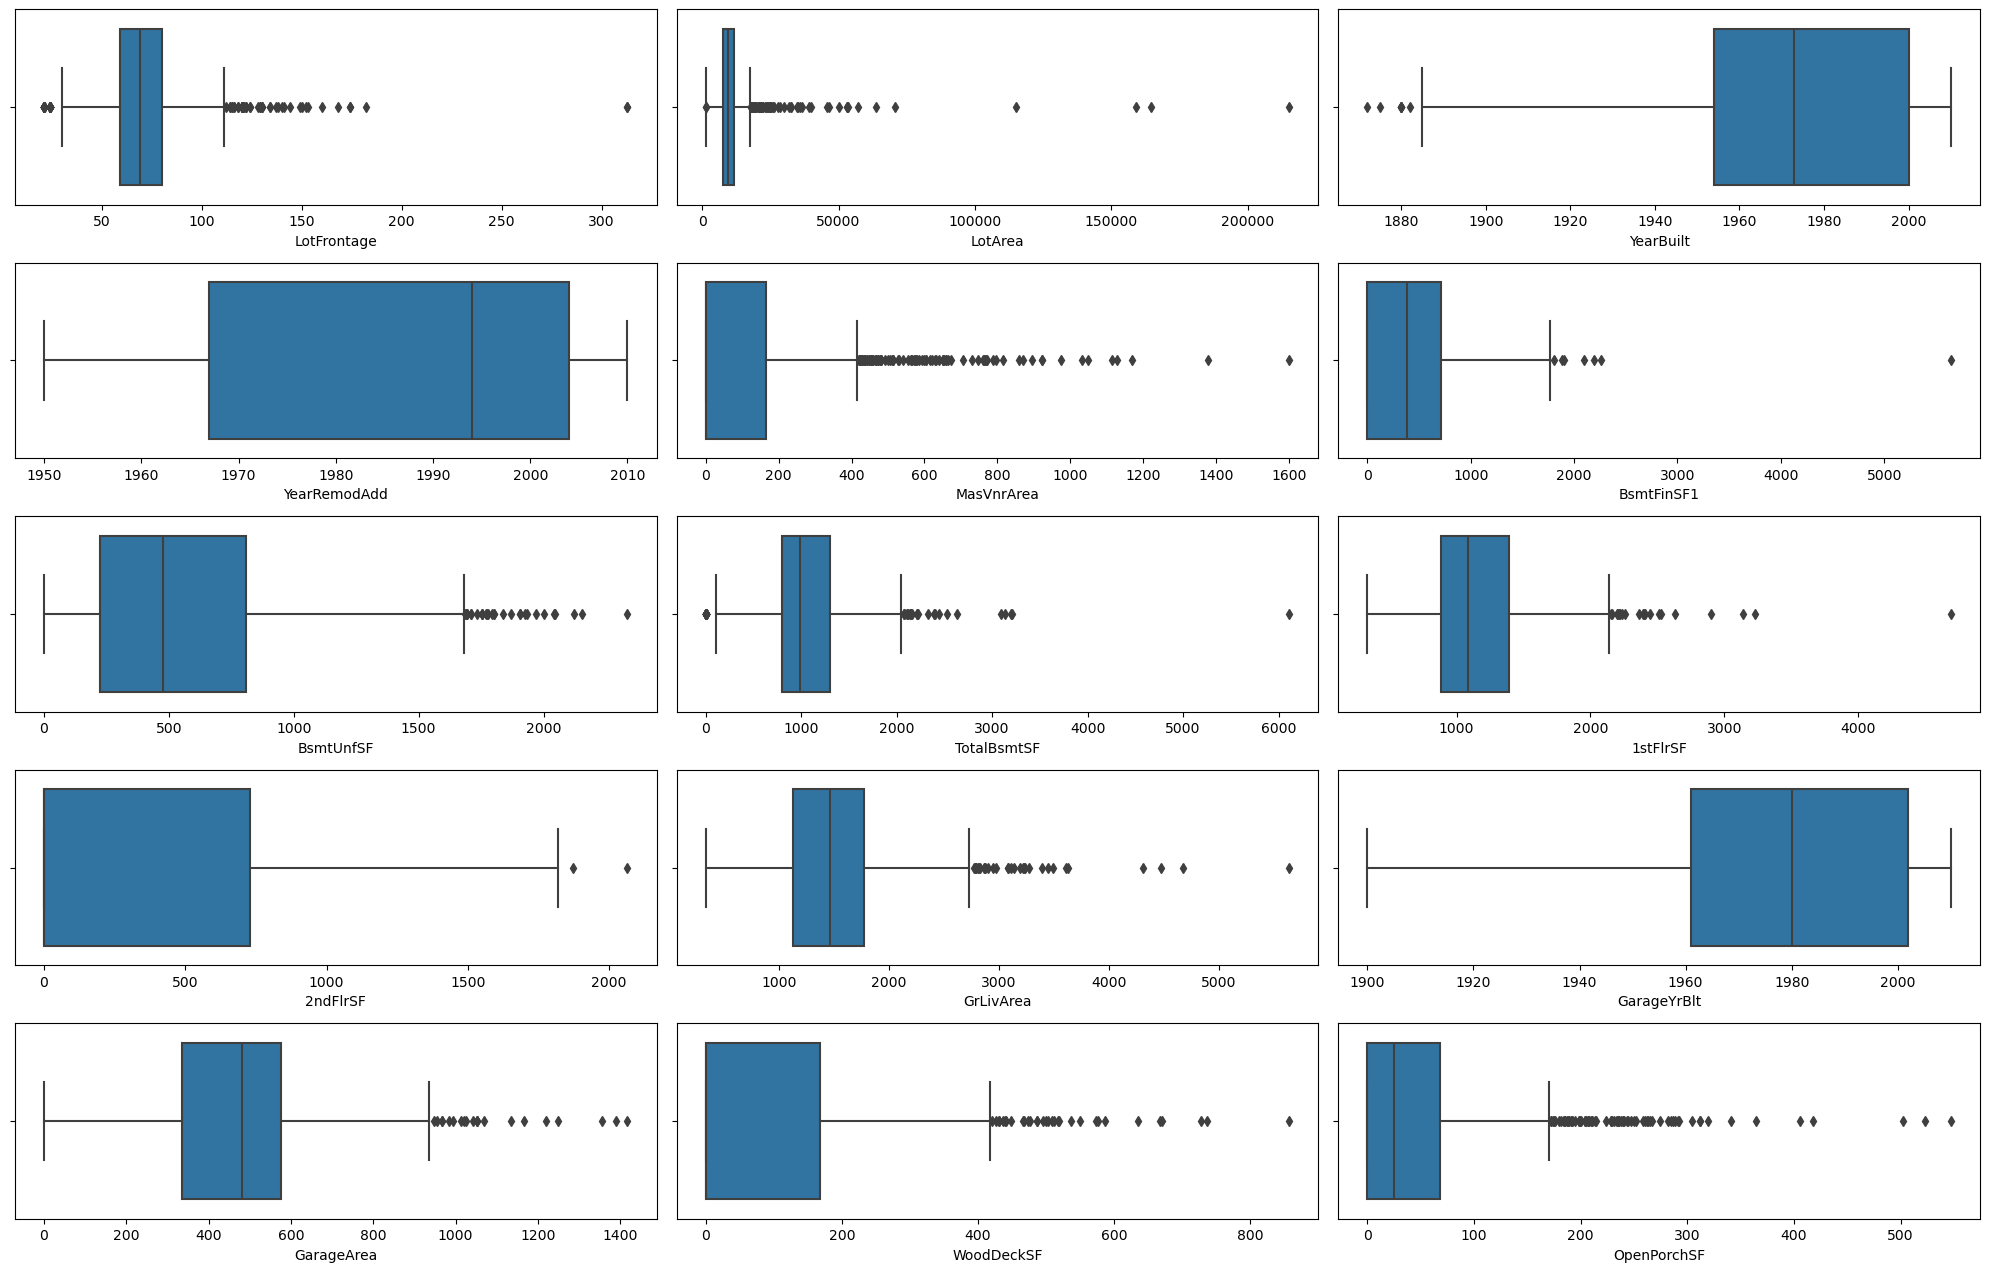

In [42]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cont:
    plt.subplot(8,3,plotnumber)
    sns.boxplot(x=list_cont[i])
    plotnumber=plotnumber+1
plt.tight_layout()


In [43]:
a=1
for i in list_cont:
    if(i in df):
        for j in df:
            if(j==i):
           
                q3=list_cont[j].quantile(0.75)
                q1=list_cont[j].quantile(0.25)
                IQR=q3-q1
                max_limit=q3+1.5*IQR
                min_limit=q1-IQR*1.5
                print(list_cont[i].median())
                df.loc[df[j]>max_limit,j]=list_cont[i].median()
                        
                df.loc[df[j]<min_limit,j]=list_cont[i].median()
                print(j,max_limit)

69.0
LotFrontage 111.5
9478.5
LotArea 17673.5
1973.0
YearBuilt 2069.0
1994.0
YearRemodAdd 2059.5
0.0
MasVnrArea 415.0
383.5
BsmtFinSF1 1780.625
477.5
BsmtUnfSF 1685.5
991.5
TotalBsmtSF 2052.0
1087.0
1stFlrSF 2155.125
0.0
2ndFlrSF 1820.0
1464.0
GrLivArea 2747.625
1980.0
GarageYrBlt 2063.5
480.0
GarageArea 938.25
0.0
WoodDeckSF 420.0
25.0
OpenPorchSF 170.0


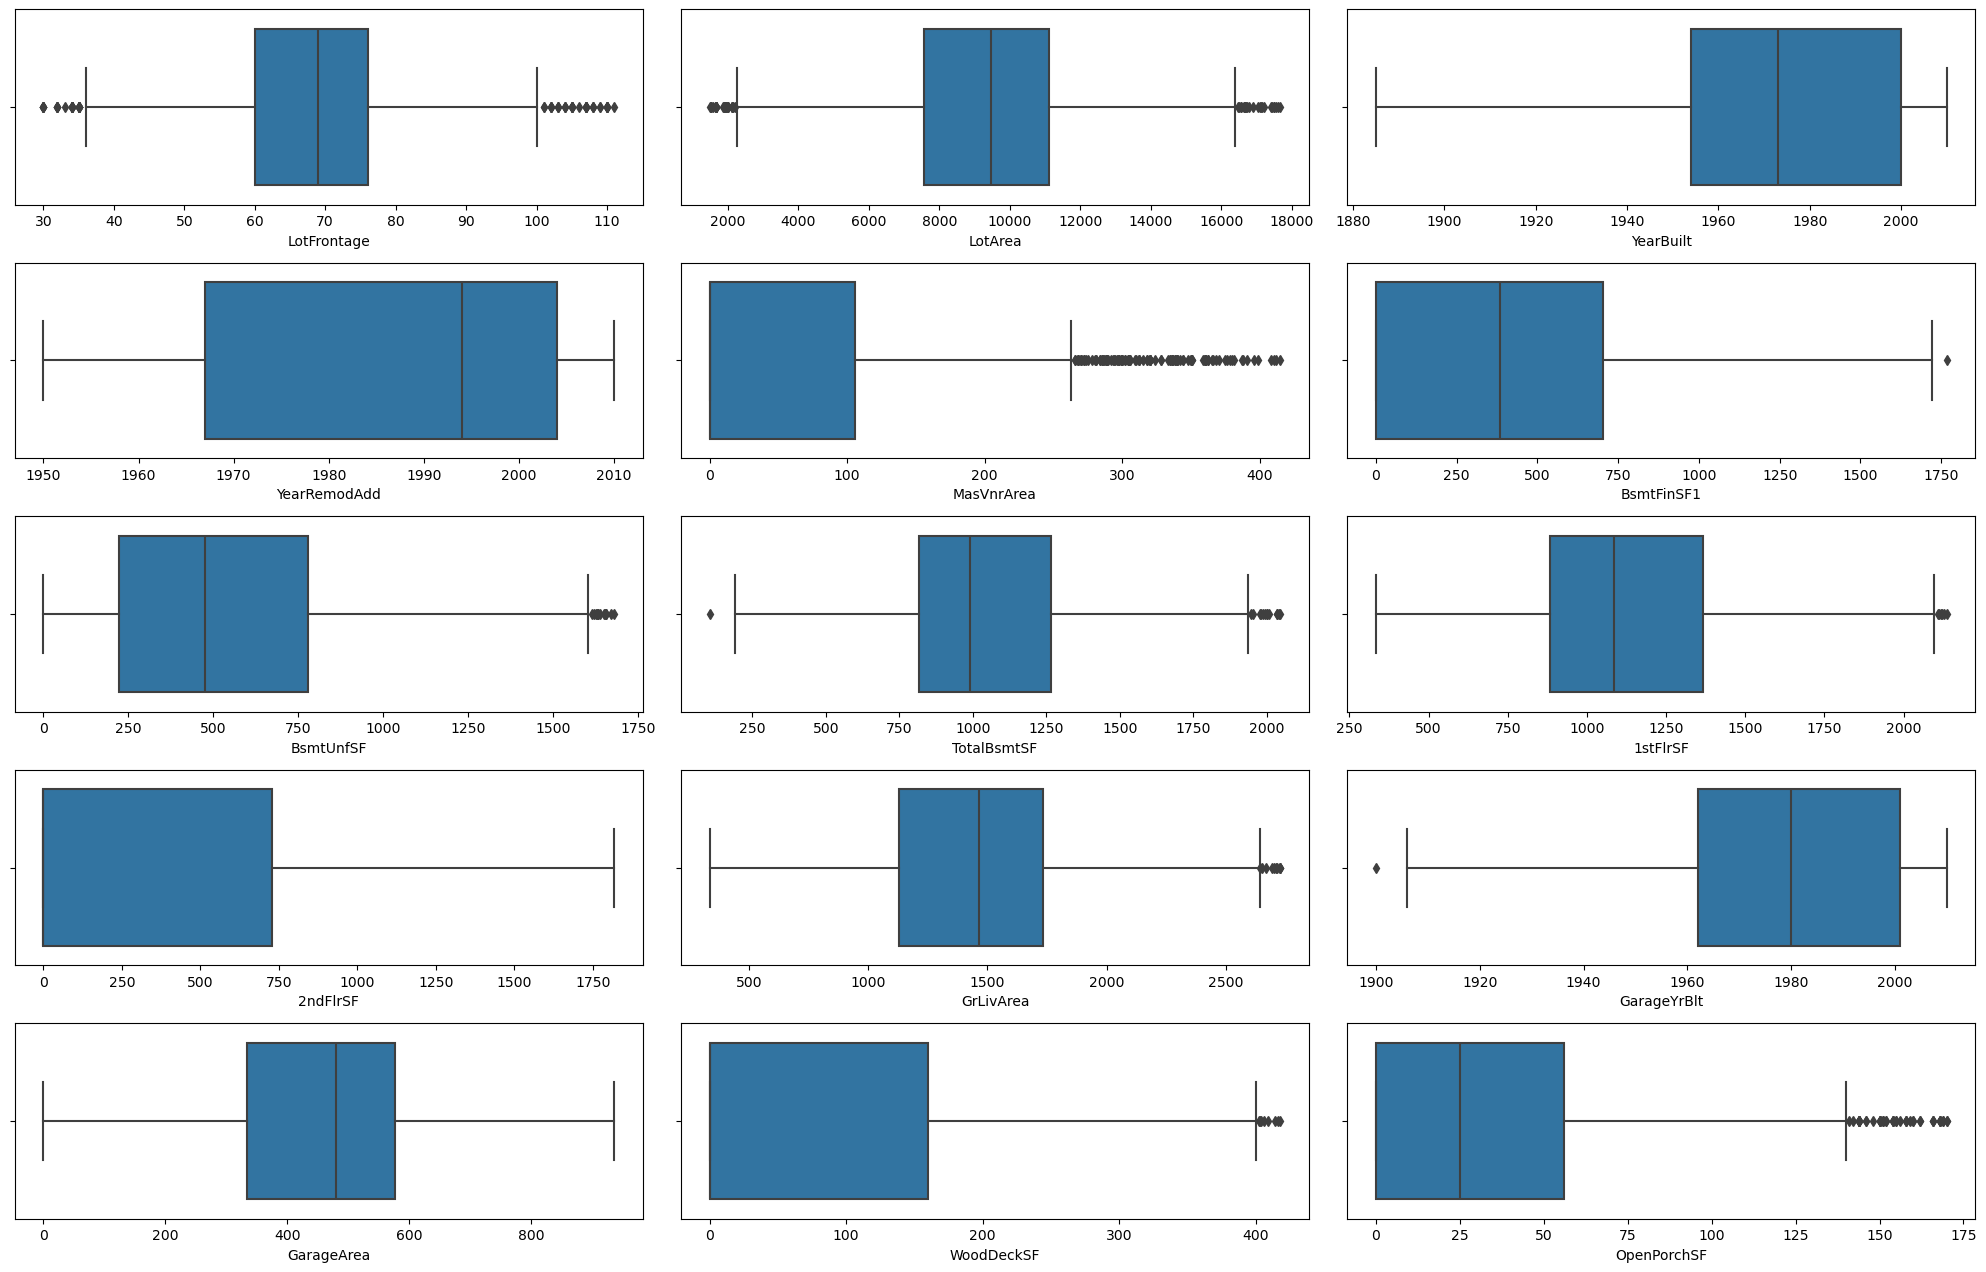

In [44]:
plt.figure(figsize=(20,20))
plotnumber=1

for i in df:
    if(i in list_cont):
            plt.subplot(8,3,plotnumber)
            sns.boxplot(x=df[i])
            plotnumber=plotnumber+1
plt.tight_layout()


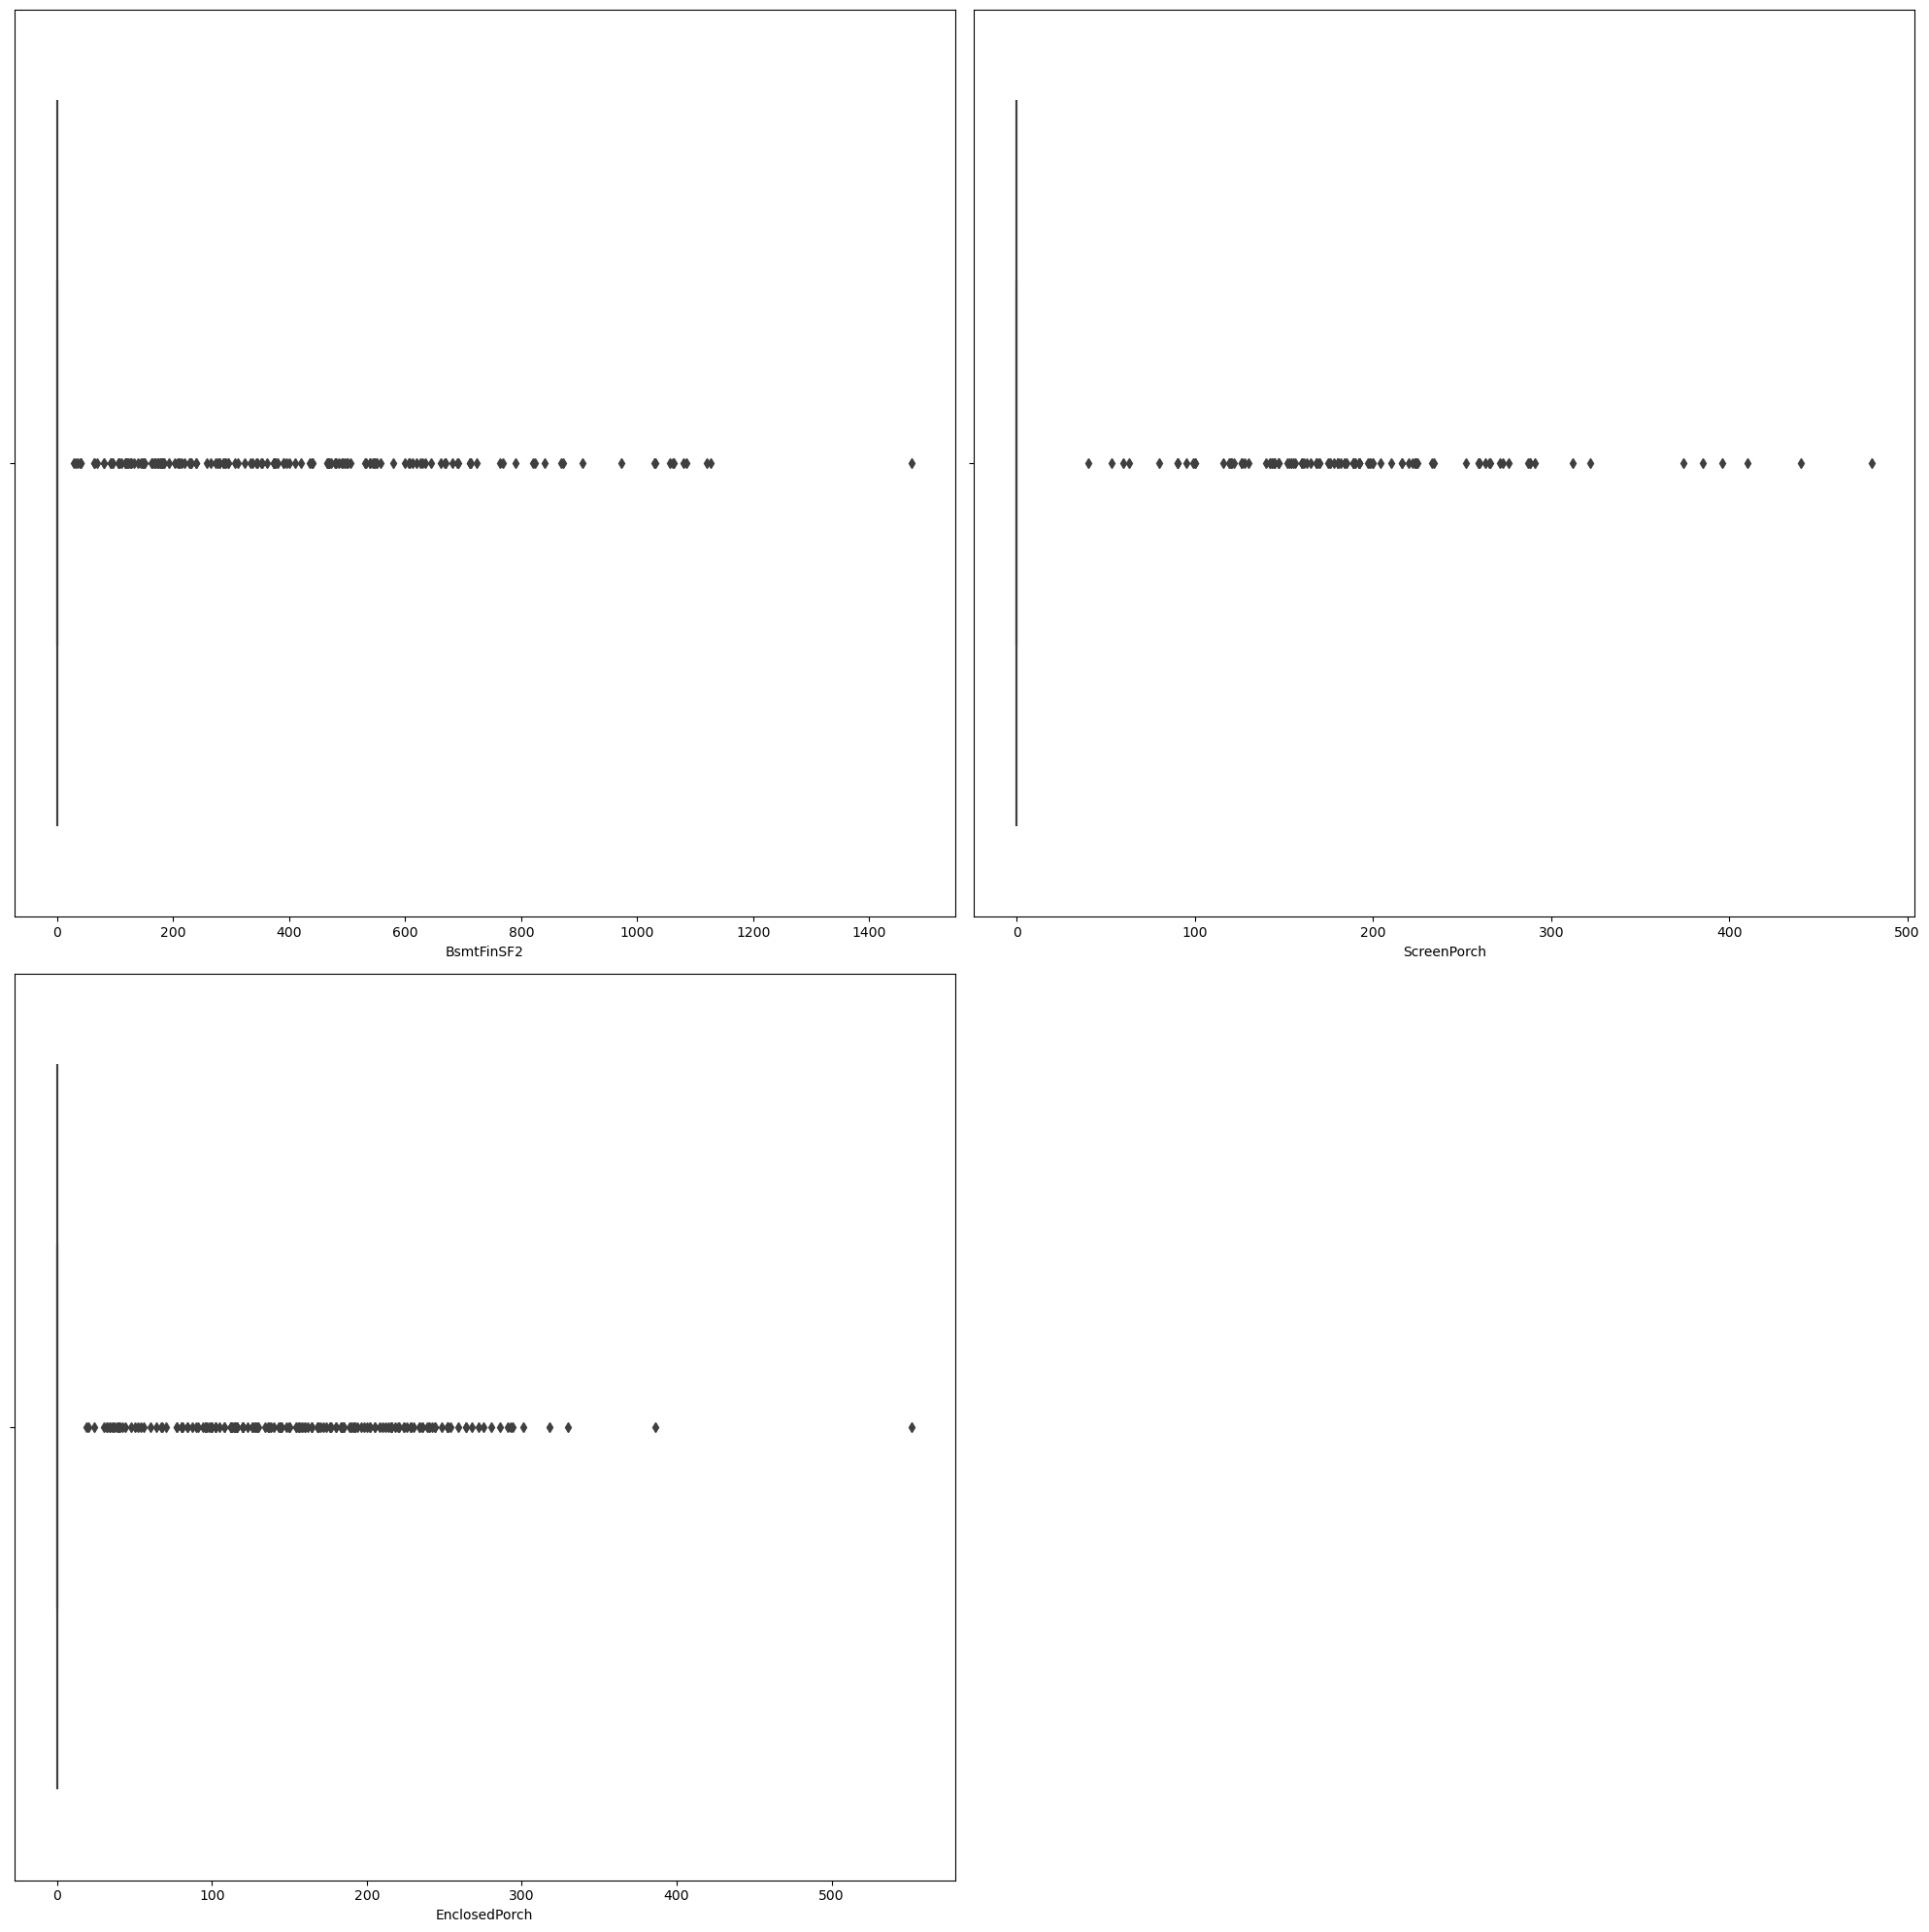

In [45]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in li_ze:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(x=li_ze[i])
    plotnumber=plotnumber+1
plt.tight_layout()

In [46]:
df.loc[df['BsmtFinSF2']>1150]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,60,RL,86.0,10380.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28.0,ALQ,1474,0.0,1502.0,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1987.0,Fin,2,576,TA,TA,Y,201,96,0,0,0,0,Grvl,MnPrv,Grvl,0,8,2007,WD,Normal,301000


In [47]:
df.loc[df['BsmtFinSF2']>1150,'BsmtFinSF2']=np.median(df.BsmtFinSF2)

In [48]:
df.loc[df['ScreenPorch']>350]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,75,RM,90.0,9478.5,Pave,Grvl,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,Grvl,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518,1518,572,1464,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,25,0,0,410,0,Grvl,GdPrv,Grvl,0,6,2006,WD,Normal,475000
359,60,RL,78.0,12011.0,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956.0,Unf,0,130.0,1086.0,GasA,Ex,Y,SBrkr,1086,838,0,1924,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,RFn,2,592,TA,TA,Y,208,75,0,0,374,0,Grvl,Grvl,Grvl,0,6,2006,WD,Normal,280000
426,80,RL,69.0,12800.0,Pave,Grvl,Reg,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,SLvl,7,5,1989,1989,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,145.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518.0,Unf,0,0.0,1518.0,GasA,Gd,Y,SBrkr,1644,0,0,1644,1,1,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1989.0,Fin,2,569,TA,TA,Y,80,0,0,0,396,0,Grvl,Grvl,Grvl,0,8,2009,WD,Normal,275000
625,20,RL,87.0,10000.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1962,1962,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,261.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0,1116.0,1116.0,GasA,TA,Y,SBrkr,1116,0,0,1116,0,0,1,1,3,1,TA,5,Typ,0,Grvl,Attchd,1962.0,Unf,2,440,TA,TA,Y,0,0,0,0,385,0,Grvl,Grvl,Grvl,0,2,2010,WD,Normal,160000
1328,50,RM,60.0,10440.0,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,Grvl,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493.0,Unf,0,1017.0,1510.0,GasW,Ex,Y,SBrkr,1584,1208,0,1464,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2,520,Fa,TA,Y,0,25,0,0,480,0,Grvl,MnPrv,Shed,1150,6,2008,WD,Normal,256000
1386,60,RL,80.0,16692.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790.0,LwQ,469,133.0,1392.0,GasA,TA,Y,SBrkr,1392,1392,0,1464,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000


In [49]:
df.loc[df['ScreenPorch']>350,'ScreenPorch']=np.median(df.ScreenPorch)

In [50]:
df.loc[df['EnclosedPorch']>350]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,69.0,9478.5,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,Grvl,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036.0,LwQ,184,140.0,1360.0,GasA,Gd,Y,SBrkr,1360,1360,392,1464,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,Grvl,0,3,2006,WD,Abnorml,235000
747,70,RM,65.0,11700.0,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1973,2003,Mansard,CompShg,Stucco,Stucco,Grvl,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0.0,Unf,0,1240.0,1240.0,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,Grvl,Grvl,Grvl,0,5,2009,WD,Normal,265979


In [51]:
df.loc[df['EnclosedPorch']>350,'EnclosedPorch']=np.median(df.EnclosedPorch)

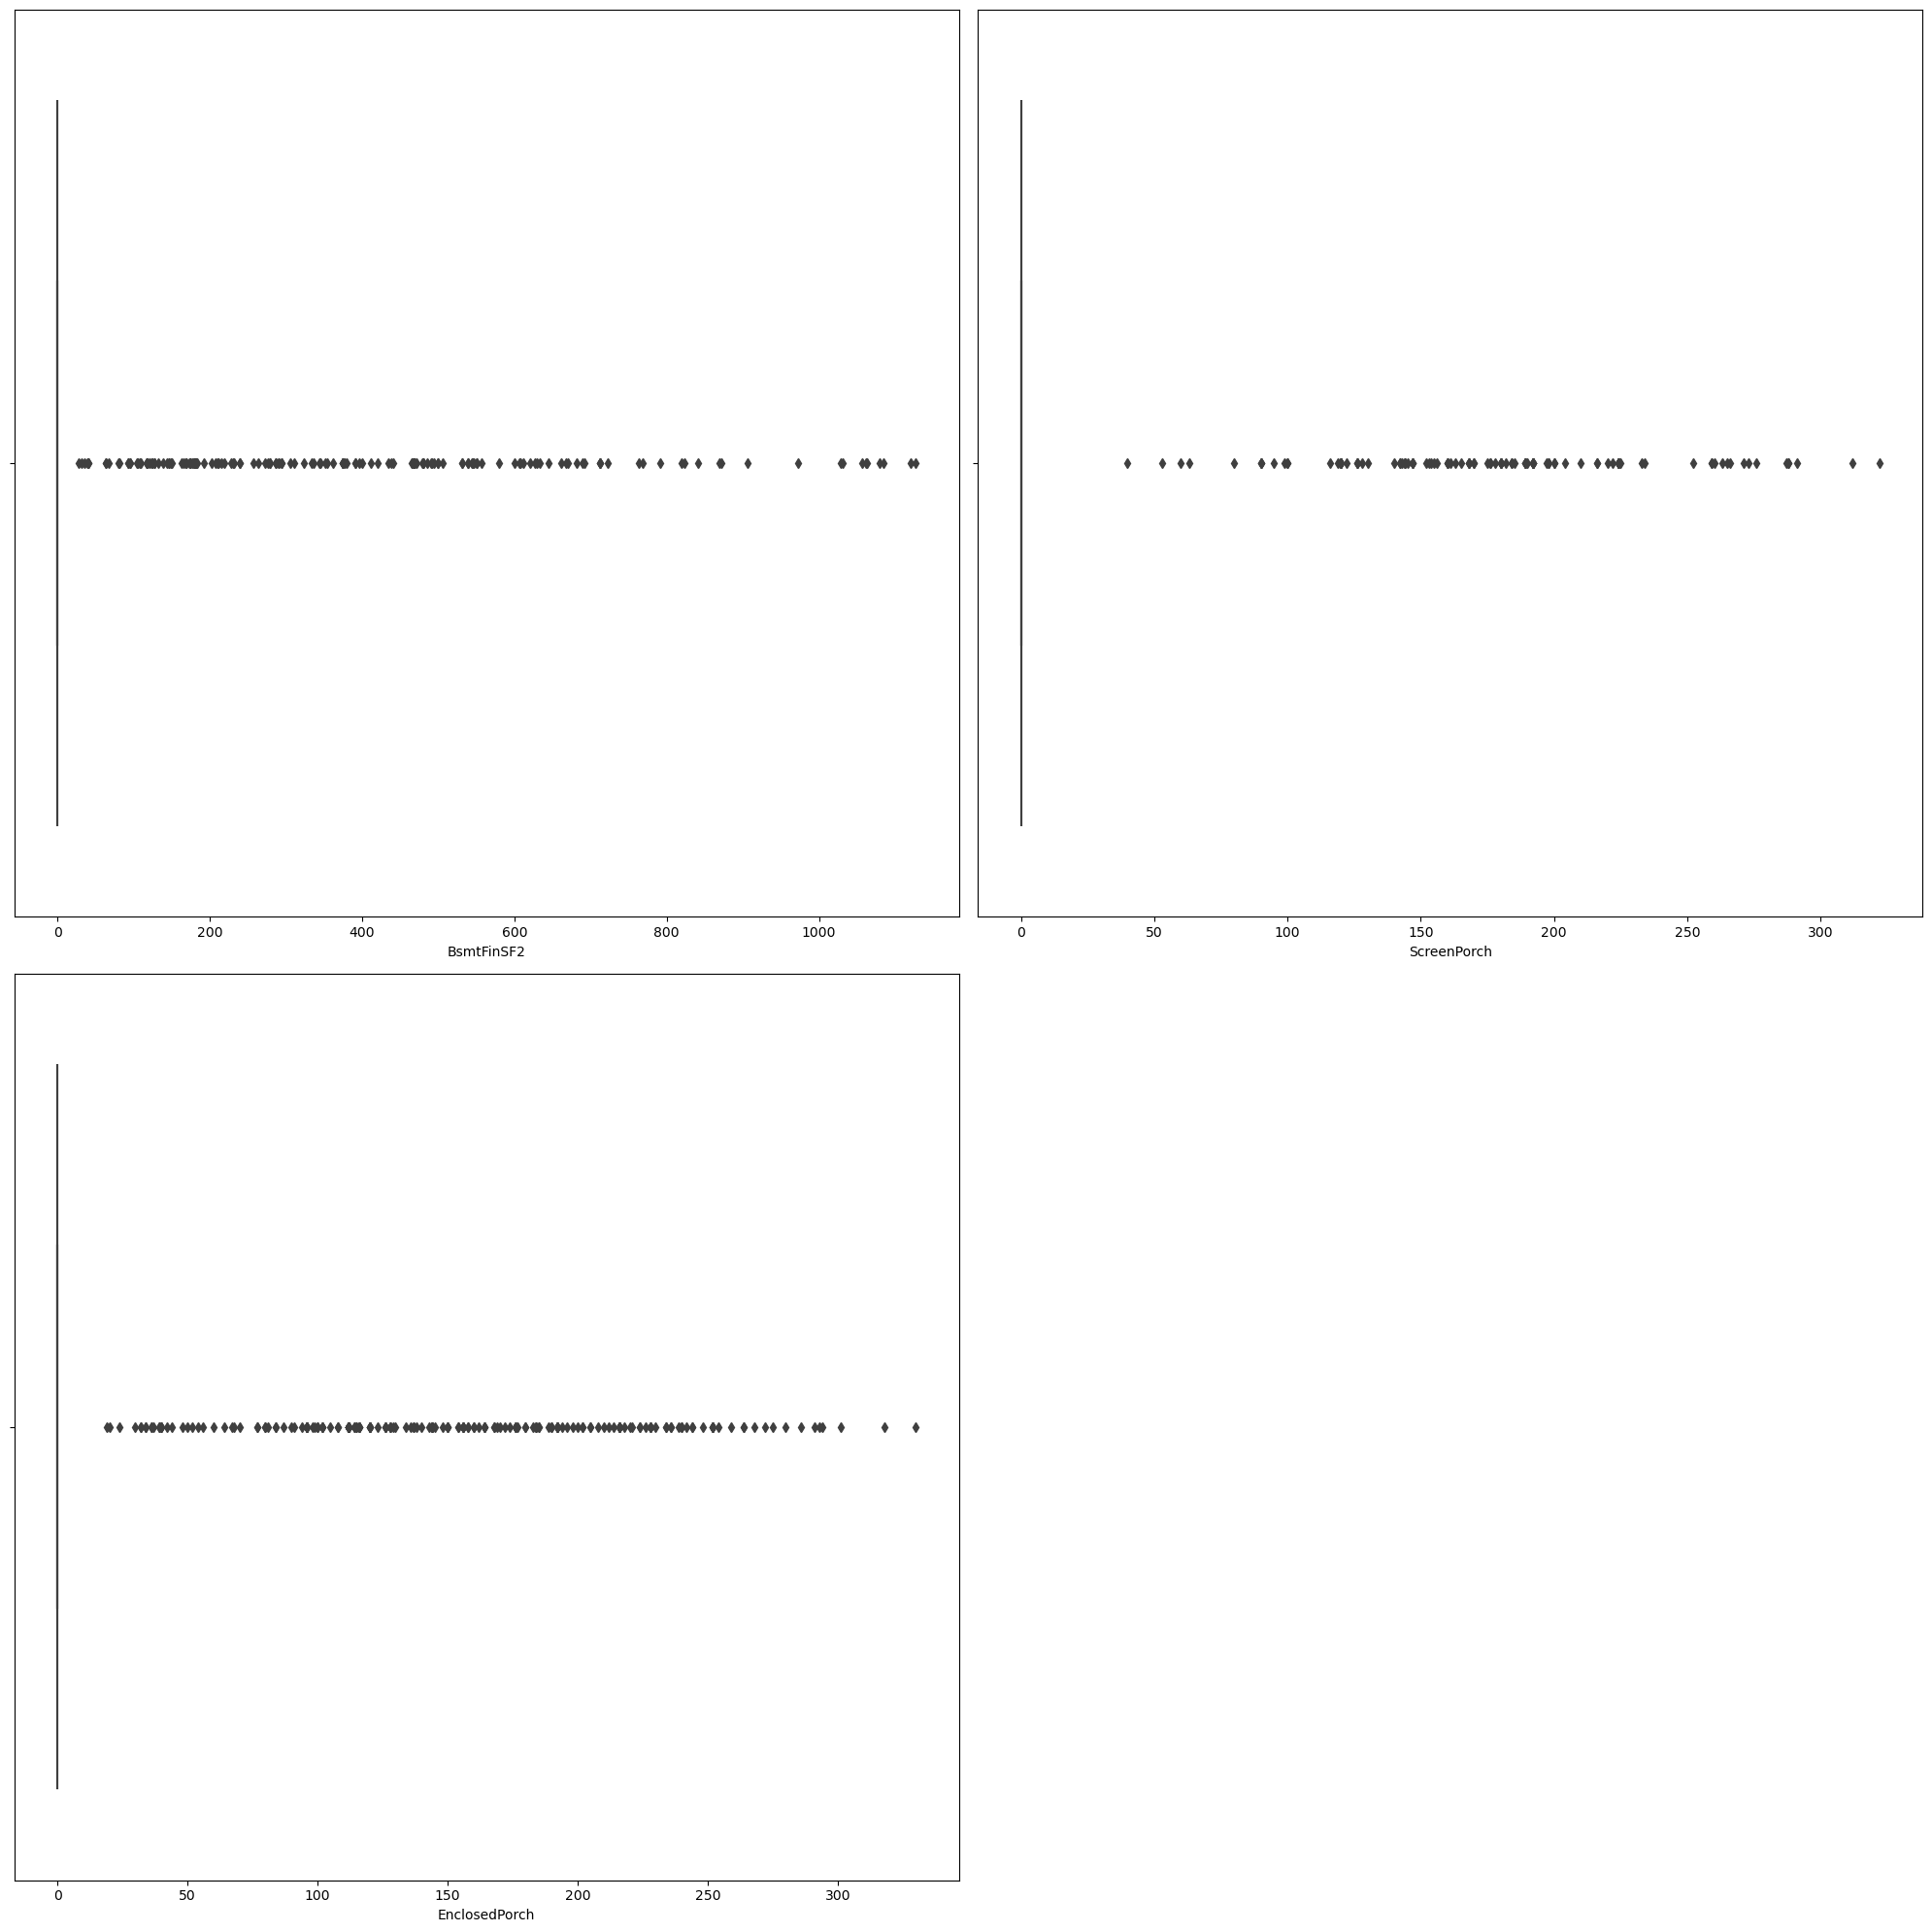

In [52]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in li_ze:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(x=df[i])
    plotnumber=plotnumber+1
plt.tight_layout()

In [53]:
for i in list_cat:
    list_cat[i].value_counts()

# Convertion of Categorical Data to Numrical Data

In [54]:
lis_obj=[]
for i in list_cat:
    if(list_cat[i].dtype =='object'):
        lis_obj.append(i)

In [55]:
lis_obj=df[lis_obj]

In [56]:
from sklearn.preprocessing import OrdinalEncoder 

In [57]:
OE=OrdinalEncoder()

In [58]:
for i in df:
    if(i in lis_obj):
        df[i]=OE.fit_transform(df[[i]])

In [59]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,706.0,6.0,0,150.0,856.0,1.0,0.0,1.0,5.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2003.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,2.0,1.0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,978.0,6.0,0,284.0,1262.0,1.0,0.0,1.0,5.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,1976.0,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,2.0,1.0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,486.0,6.0,0,434.0,920.0,1.0,0.0,1.0,5.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2001.0,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,2.0,1.0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,216.0,6.0,0,540.0,756.0,1.0,2.0,1.0,5.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,2.0,1.0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,655.0,6.0,0,490.0,1145.0,1.0,0.0,1.0,5.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,2000.0,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,2.0,1.0,0,12,2008,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3.0,62.0,7917.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6,5,1999,2000,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,2.0,4.0,4.0,6.0,0.0,6.0,0,953.0,953.0,1.0,0.0,1.0,5.0,953,694,0,1647,0,0,2,1,3,1,3.0,7,6.0,1,5.0,1.0,1999.0,2.0,2,460,5.0,5.0,2.0,0,40,0,0,0,0,3.0,2.0,1.0,0,8,2007,8.0,4.0,175000
1456,20,3.0,85.0,13175.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6,6,1978,1988,1.0,1.0,9.0,10.0,3.0,119.0,3.0,4.0,1.0,2.0,4.0,4.0,0.0,790.0,5.0,163,589.0,1542.0,1.0,4.0,1.0,5.0,2073,0,0,2073,1,0,2,0,3,1,3.0,7,2.0,2,5.0,1.0,1978.0,3.0,2,500,5.0,5.0,2.0,349,0,0,0,0,0,3.0,3.0,1.0,0,2,2010,8.0,4.0,210000
1457,70,3.0,66.0,9042.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,7,9,1941,2006,1.0,1.0,5.0,5.0,2.0,0.0,0.0,2.0,4.0,4.0,1.0,4.0,2.0,275.0,6.0,0,877.0,1152.0,1.0,0.0,1.0,5.0,1188,1152,0,2340,0,0,2,0,4,1,2.0,9,6.0,2,2.0,1.0,1941.0,2.0,1,252,5.0,5.0,2.0,0,60,0,0,0,0,3.0,0.0,3.0,2500,5,2010,8.0,4.0,266500
1458,20,3.0,68.0,9717.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5,6,1950,1996,3.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,4.0,4.0,3.0,2.0,49.0,5.0,1029,0.0,1078.0,1.0,2.0,1.0,0.0,1078,0,0,1078,1,0,1,0,2,1,2.0,5,6.0,0,3.0,1.0,1950.0,3.0,1,240,5.0,5.0,2.0,366,0,112,0,0,0,3.0,2.0,1.0,0,4,2010,8.0,4.0,142125


In [60]:
df.LandContour.value_counts()

LandContour
3.0    1311
0.0      63
1.0      50
2.0      36
Name: count, dtype: int64

In [61]:
list_high=[]
for i in df:
    if(df[i].values>100).any():
        list_high.append(i)

In [62]:
list_high.remove('SalePrice')

In [63]:

list_high

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

# Scaling of Data 

In [64]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [65]:
x=df.drop('SalePrice',axis=1)

In [66]:
y=df.SalePrice

In [67]:
scaled_data=st.fit_transform(x)
scaled_data

array([[ 0.07337496, -0.04553194, -0.27281353, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.75907184, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194, -0.06643646, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.30985939, -0.04553194, -0.20402117, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194, -0.06643646, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.41511005, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

In [68]:
data=pd.DataFrame(data=scaled_data,columns=x.columns)

In [69]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.272814,-0.266799,0.064238,-0.169981,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.060436,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.241449,1.275862,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.651473,-0.521322,0.644729,0.342217,-0.290286,-0.971954,-0.589594,-0.123046,-0.884658,0.263813,0.304256,-0.835181,1.178779,-0.120242,0.524793,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.075117,-0.768736,1.017598,0.103495,0.311725,0.421310,0.315602,0.295349,0.289745,-0.775711,0.604457,-0.362832,-0.116339,-0.270175,-0.068692,0.063305,-0.008268,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.759072,0.101854,0.064238,-0.169981,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,0.145062,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.596056,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.281760,-1.408421,1.287800,0.342217,-0.290286,-0.637815,0.602011,-0.123046,-0.884658,0.263813,0.304256,0.348826,-0.796244,-0.120242,-0.482008,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.638498,-0.768736,-0.107927,0.103495,0.311725,-0.020480,0.315602,0.295349,0.289745,2.022812,-0.811305,-0.362832,-0.116339,-0.270175,-0.068692,0.063305,-0.008268,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.066436,0.630791,0.064238,-0.169981,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,0.992630,0.830215,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.951142,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.007062,-0.521322,0.124597,0.342217,-0.290286,-0.263779,-0.401755,-0.123046,-0.884658,0.263813,0.304256,-0.648539,1.206531,-0.120242,0.695590,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.638498,-0.768736,0.934226,0.103495,0.311725,0.722530,0.315602,0.295349,0.289745,-0.775711,0.163482,-0.362832,-0.116339,-0.270175,-0.068692,0.063305,-0.008268,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.616775,0.085825,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.923005,-0.720298,-0.491516,-0.125797,1.055928,1.316701,0.387047,-0.596056,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.651473,-1.408421,-0.513745,0.342217,-0.290286,0.000541,-0.883093,-0.123046,0.265476,0.263813,0.304256,-0.528972,0.952137,-0.120242,0.540524,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.931925,1.301075,0.809167,0.942959,1.650307,0.893222,0.315602,0.295349,0.289745,-0.775711,0.001017,4.267980,-0.116339,-0.270175,-0.068692,0.063305,-0.008268,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,1.034241,1.595700,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.0266

# Principal Component Analysis(PCA)

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA()  



In [72]:
principalComponents=pca.fit_transform(df)

In [73]:
principalComponents

array([[ 2.75625684e+04, -1.27945190e+03,  2.45341386e+02, ...,
        -5.23678877e-03,  1.15806182e-02, -3.13003864e-04],
       [ 5.84231496e+02,  3.13171072e+02, -7.31705190e+02, ...,
         1.63160160e-02,  1.54337691e-02, -8.75132528e-03],
       [ 4.26052271e+04,  1.28166801e+03,  4.59983799e+02, ...,
        -1.25139826e-02,  1.91245987e-02,  5.52750781e-03],
       ...,
       [ 8.55666013e+04, -1.57279458e+03,  9.98759838e+02, ...,
        -5.79681758e-03, -4.68727838e-02,  3.46764733e-04],
       [-3.87871906e+04,  1.04836474e+03, -3.37256979e+02, ...,
        -8.92591723e-03,  1.62643538e-02, -1.42594468e-02],
       [-3.34064422e+04,  1.19277012e+03, -6.86479130e+02, ...,
         7.24151323e-03, -1.89416823e-02,  4.28125585e-03]])

In [74]:
principalComponents1=pd.DataFrame(data=principalComponents)
principalComponents1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,27562.568443,-1279.451904,245.341386,237.946433,-695.898818,-60.068565,-101.919786,-44.124430,-87.784383,10.675568,-65.237100,-27.830774,141.740319,-19.949481,14.674809,-26.116453,-14.632324,8.302831,-19.364474,-8.089065,-29.693056,4.772453,-4.834720,-1.057700,7.879035,-1.141523,-4.355468,-0.556996,-1.302505,0.291795,-0.299666,0.450432,0.165092,-0.101431,0.070780,-0.488905,1.085390,-0.369066,-0.783030,-0.293334,0.038573,0.503544,-0.332351,-0.154388,-1.021208,0.416656,-0.052483,0.257188,-0.165676,0.008054,0.243156,-0.024328,0.201518,0.013186,0.011994,-0.000015,0.181479,-0.279491,-0.465061,-0.248827,0.058913,-0.018808,0.709328,0.028523,-0.081468,-0.047198,0.280824,0.104314,-0.012964,0.076758,-0.171990,-0.069176,0.062812,0.088627,0.000287,-0.021805,-0.000962,-0.005237,0.011581,-0.000313
1,584.231496,313.171072,-731.705190,25.705457,-149.145593,-100.375364,-133.597814,-18.688553,30.462275,5.220087,-4.385481,137.949351,-169.456797,1.371943,-4.041366,9.373009,17.732605,-22.927609,-30.154312,-3.782253,4.008455,-11.314855,8.520665,1.255245,-12.336121,-0.536667,-1.307186,1.788028,-0.122400,-0.684539,-0.647275,0.640911,2.118232,0.084936,-1.167258,-1.583163,0.619618,0.569166,2.094428,-1.039012,-0.468670,-0.744213,1.228560,-0.297685,0.036203,0.881948,-0.050477,1.614987,-0.072572,-1.269424,-0.605087,0.251226,-1.164489,0.085372,0.252963,0.171916,-0.115150,-0.161600,0.264545,0.106070,-0.033228,0.258650,-0.483474,0.636479,-0.241552,0.167412,-0.833506,-0.086065,0.074267,0.019423,-0.009026,-0.007512,0.072168,0.585005,-0.133553,-0.074947,0.058926,0.016316,0.015434,-0.008751
2,42605.227143,1281.668010,459.983799,110.451922,-441.804099,72.126476,-114.068798,-48.377090,-108.046005,20.464293,-58.673491,-48.716643,113.691797,-20.269056,14.535464,-23.797246,1.842928,-12.091903,-0.496465,-8.146250,-24.386091,5.493272,-5.802402,-2.199442,8.067460,-0.359359,2.724767,1.207020,-0.909655,-0.146419,-0.537467,0.837454,0.347815,-0.270337,0.289705,1.740489,-0.456094,-0.428097,1.462414,-0.313781,0.051004,-0.821343,-0.760144,0.460924,-0.814731,-0.022213,-0.194172,-0.170812,0.026509,0.558730,0.106914,-0.109314,0.238319,0.091498,-0.222618,0.036980,-0.016194,-0.140943,-0.412039,-0.139413,0.149506,0.086746,-0.201081,-0.009561,0.137400,-0.304955,0.405257,0.347835,-0.081241,0.202019,-0.180801,-0.039586,-0.062685,0.145225,-0.042575,0.105564,0.007736,-0.012514,0.019125,0.005528
3,-40911.076471,916.669263,593.920924,18.370652,-238.087212,-180.055887,-17.204153,21.955566,-220.488829,-33.627296,51.026708,-119.331610,-34.260335,236.666822,-29.027689,14.606949,-13.738158,22.972625,21.304821,3.043141,-18.260416,2.546656,-21.365692,34.551891,8.659381,-2.213246,-3.843935,5.600112,1.941568,0.741069,1.335289,-0.552872,0.492620,0.395420,-2.017468,0.824928,1.270261,-0.112198,-1.675098,-0.281375,2.476472,1.531823,-1.593702,2.640715,0.376630,0.206834,-1.545700,-0.610201,-0.007813,1.100415,1.265378,-0.703517,-1.679193,0.431382,-0.639109,-0.266955,0.172954,-0.034801,0.640520,-0.174685,-0.476955,0.446775,-0.074967,-0.416823,0.071995,0.292404,0.499102,-0.039238,0.997065,-0.584151,0.440333,0.248902,0.054579,-0.000657,0.154475,0.106312,-0.097667,-0.000375,0.018198,-0.013768
4,69152.801169,3883.446406,557.214541,94.530717,-464.567966,-301.519297,-162.195562,-113.421591,-269.219091,31.544225,-67.128464,163.872503,145.037495,-2.687789,14.178574,-6.222151,-14.243813,14.515141,6.389699,-6.096370,1.584657,5.647472,-1.301671,1.273856,-0.427746,-2.138362,5.274401,1.527201,0.485563,-0.906660,0.231711,-0.617157,1.124076,0.503241,0.698727,0.043406,-1.474038,0.463281,1.992266,-0.643766,-0.284413,0.228965,0.266188,-0.940735,-0.724439,0.489864,-0.345199,0.097503,0.511728,0.152508,0.498010,-0.379507,-0.159524,0.057091,0.091840,-0.153329,-0.093736,-0.415314,-0.161966,0.300476,0

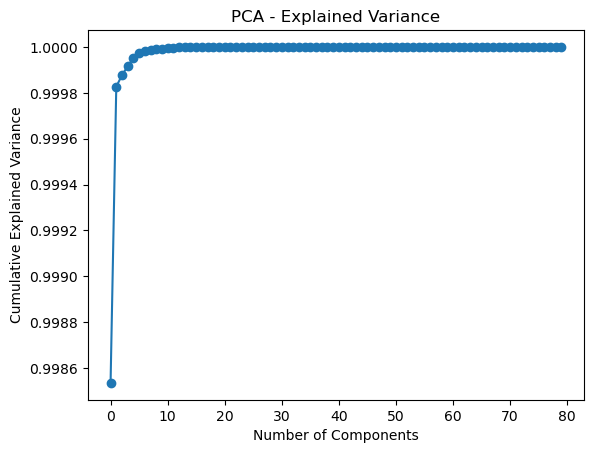

In [75]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

In [76]:
pca=PCA(n_components=6)
new_data=pca.fit_transform(df)

In [77]:
new_data

array([[ 2.75625684e+04, -1.27945190e+03,  2.45341386e+02,
         2.37946433e+02, -6.95898818e+02, -6.00685646e+01],
       [ 5.84231496e+02,  3.13171072e+02, -7.31705190e+02,
         2.57054566e+01, -1.49145593e+02, -1.00375364e+02],
       [ 4.26052271e+04,  1.28166801e+03,  4.59983799e+02,
         1.10451922e+02, -4.41804099e+02,  7.21264762e+01],
       ...,
       [ 8.55666013e+04, -1.57279458e+03,  9.98759838e+02,
         2.31597043e+03,  8.56625812e+02, -3.00003957e+02],
       [-3.87871906e+04,  1.04836474e+03, -3.37256979e+02,
        -1.18381418e+01, -1.15830128e+02,  3.43779069e+02],
       [-3.34064422e+04,  1.19277012e+03, -6.86479130e+02,
         3.34369510e+01, -2.01421508e+02, -1.78984647e+02]])

In [78]:
principal_df=pd.DataFrame(data=new_data,columns=['principalComponents_1','principalComponents_2','principalComponents_3','principalComponents_4','principalComponents_5','principalComponents_6'])

In [79]:
principal_df

,principalComponents_1,principalComponents_2,principalComponents_3,principalComponents_4,principalComponents_5,principalComponents_6
0,27562.568443,-1279.451904,245.341386,237.946433,-695.898818,-60.068565
1,584.231496,313.171072,-731.705190,25.705457,-149.145593,-100.375364
2,42605.227143,1281.668010,459.983799,110.451922,-441.804099,72.126476
3,-40911.076471,916.669263,593.920924,18.370652,-238.087212,-180.055887
4,69152.801169,3883.446406,557.214541,94.530717,-464.567966,-301.519297
...,...,...,...,...,...,...
1455,-5942.201045,-1275.632006,693.866299,-129.351695,208.358288,28.774939
1456,29142.197414,3468.499144,-482.184571,-197.139013,325.706151,-810.556693
1457,85566.601290,-1572.794580,998.759838,2315.970433,856.625812,-300.003957
1458,-38787.190621,1048.364745,-337.256979,-11.838142,-115.830128,343.779069


# Model Creation 

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_df,y,test_size=0.20 ,random_state=42)

In [81]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 6)
(292, 6)
(1168,)
(292,)


## Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=lr.predict(x_test)
y_pred

array([154499.96231672, 325000.07363414, 115000.00195321, 159000.00818865,
       315500.29477219,  75499.62859061, 311499.60730878, 146000.07475094,
        84499.56463186, 135500.01622932, 144999.83640781, 129999.98875086,
        81000.2405045 , 213999.99559088, 181000.07576943, 134499.91886786,
       183500.07448818, 134999.84990225, 118399.95623764, 226000.09099613,
       154999.43824715, 210000.2114825 , 173500.2049395 , 128999.86548018,
       192000.19653941, 153900.14719702, 181133.98799284, 141000.04647927,
       181000.06999099, 208899.93669358, 127000.05064404, 284000.40840056,
       200499.81466528, 135749.93744393, 255000.26078436, 140000.04048922,
       137999.74819818, 219499.99856712, 310000.21957413,  96999.80636258,
       114500.07896852, 204999.88217565, 119499.87275347, 253292.372937  ,
       128500.25888666, 117499.8076687 , 114999.74805289, 127000.07288873,
       451950.02383618, 143999.99299263, 118999.87915463, 196000.34483221,
       114999.91782386, 2

In [85]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

## Model Evaultion

In [86]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
r2=r2_score(y_test,y_pred)
r2

0.9999999999931993

In [88]:
adj_r2=1-(1-r2)*(292-1)/(292-6-1)
adj_r2

0.9999999999930561

In [89]:
mse=mean_squared_error(y_test,y_pred)
mse

0.052162941777865304

In [90]:
import math 
rmse=math.sqrt(mse)
rmse

0.22839207906112965

In [92]:
mean_absolute_error(y_test,y_pred)

0.17063349782450768

## Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score
lr1=LinearRegression()

In [100]:
cv=cross_val_score(lr1,principal_df,y,scoring='r2',cv=5)

In [101]:
cv.mean()

0.9999999999912379

In [102]:
cv.std()

1.9657810513959456e-12

## Hyperparameter Tunning

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [104]:
ridge = Ridge()

In [105]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [106]:
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [107]:
 grid_search.best_params_


{'alpha': 0.01}

In [108]:
grid_search.estimator

Ridge()

In [109]:
lr2=LinearRegression()

In [110]:
lr2.fit(x_train,y_train)

LinearRegression()

### Testing Data

In [111]:
y_pred_lrh=lr2.predict(x_test)
y_pred_lrh

array([154499.96231672, 325000.07363414, 115000.00195321, 159000.00818865,
       315500.29477219,  75499.62859061, 311499.60730878, 146000.07475094,
        84499.56463186, 135500.01622932, 144999.83640781, 129999.98875086,
        81000.2405045 , 213999.99559088, 181000.07576943, 134499.91886786,
       183500.07448818, 134999.84990225, 118399.95623764, 226000.09099613,
       154999.43824715, 210000.2114825 , 173500.2049395 , 128999.86548018,
       192000.19653941, 153900.14719702, 181133.98799284, 141000.04647927,
       181000.06999099, 208899.93669358, 127000.05064404, 284000.40840056,
       200499.81466528, 135749.93744393, 255000.26078436, 140000.04048922,
       137999.74819818, 219499.99856712, 310000.21957413,  96999.80636258,
       114500.07896852, 204999.88217565, 119499.87275347, 253292.372937  ,
       128500.25888666, 117499.8076687 , 114999.74805289, 127000.07288873,
       451950.02383618, 143999.99299263, 118999.87915463, 196000.34483221,
       114999.91782386, 2

In [112]:
r2_score(y_test,y_pred_lrh)

0.9999999999931993

In [113]:
mean_absolute_error(y_test,y_pred_lrh)

0.17063349782450768

In [114]:
mean_squared_error(y_test,y_pred_lrh)

0.052162941777865304

In [115]:
math.sqrt(mean_squared_error(y_test,y_pred_lrh))

0.22839207906112965

### Training Data 

In [101]:
y_pred_lrhtr=lr2.predict(x_train)
y_pred_lrhtr

array([145000.01288418, 177999.98398718,  84999.86560885, ...,
       115000.26605927, 189949.75962821, 174000.13648783])

In [102]:
r2_score(y_train,y_pred_lrhtr)

0.9999999999910585

In [103]:
mean_absolute_error(y_train,y_pred_lrhtr)

0.17064374895946383

In [104]:
mean_squared_error(y_train,y_pred_lrhtr)

0.05333221069448291

In [105]:
math.sqrt(mean_squared_error(y_train,y_pred_lrhtr))

0.23093767707865018

# SVM 

In [106]:
from sklearn.svm import SVR


In [107]:
svm_regressor = SVR()

In [108]:
svm_regressor.fit(x_train,y_train)

SVR()

In [109]:
y_pred_svr=svm_regressor.predict(x_test)
y_pred_svr

array([164918.15234099, 165255.05266087, 164729.5097994 , 164952.21370977,
       165273.80201494, 164788.43605643, 165281.63633737, 164859.54283505,
       164758.82749625, 164801.4467522 , 164852.14529243, 164772.29634203,
       164767.59094763, 165332.82595022, 165127.74160645, 164792.489031  ,
       165147.05212136, 164794.87887887, 164735.60625623, 165372.18018172,
       164923.13912068, 165315.02652734, 165068.2227057 , 164768.12484233,
       165209.28459363, 164913.69162308, 165128.90562361, 164827.68267226,
       165128.15442169, 165308.20879555, 164760.33811333, 165343.01134764,
       165264.33716977, 164798.68437194, 165390.62255014, 164821.83824918,
       164810.56957716, 165353.11630679, 165285.0736371 , 164730.80556938,
       164728.84711113, 165289.79820113, 164738.23361926, 165392.14706639,
       164766.28011628, 164734.15981344, 164729.40625239, 164760.33428718,
       165130.56949374, 164846.47058304, 164736.88869109, 165236.23943739,
       164731.1139012 , 1

In [110]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [111]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [112]:
mean_absolute_error(y_test,y_pred_svr)

59349.15085944799

In [113]:
mean_squared_error(y_test,y_pred_svr)

7833016410.777514

In [114]:
r2_svr=r2_score(y_test,y_pred_svr)
r2_svr

-0.02121033697862118

In [115]:
adj_r2=1-(1-r2_svr)*(1168-1)/(1168-6-1)
adj_r2

-0.026487909779544294

In [116]:
math.sqrt(mean_squared_error(y_test,y_pred_svr))

88504.32989847171

# Cross validation

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
svr1 = SVR()

In [119]:
cv = cross_val_score(svr1,principal_df,y,scoring='r2',cv=5)

In [120]:
cv.mean()

-0.04731561313217321

In [121]:
cv.std()

0.018704650522740406

# Hyperparameter Tunnig

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
svr2=SVR()

In [124]:
param_grid ={'C':[0.1,1,10,100,1000],'gamma':[0.00001,0.0001,0.001,0.01,0.1]}

In [125]:
grid = GridSearchCV(svr2,param_grid,scoring='r2',cv=5,verbose=3)

In [126]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...............C=0.1, gamma=1e-05;, score=-0.046 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=1e-05;, score=-0.114 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=1e-05;, score=-0.016 total time=   0.0s
[CV 4/5] END ...............C=0.1, gamma=1e-05;, score=-0.033 total time=   0.0s
[CV 5/5] END ...............C=0.1, gamma=1e-05;, score=-0.054 total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=0.0001;, score=-0.046 total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=0.0001;, score=-0.114 total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=0.0001;, score=-0.016 total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=0.0001;, score=-0.033 total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=0.0001;, score=-0.054 total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=0.001;, score=-0.046 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.001;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='r2', verbose=3)

In [127]:
grid.best_params_

{'C': 1000, 'gamma': 1e-05}

In [128]:
grid.best_estimator_

SVR(C=1000, gamma=1e-05)

In [129]:
svr3=SVR(C=1000, gamma=1e-05)
svr3

SVR(C=1000, gamma=1e-05)

In [130]:
svr3.fit(x_train,y_train)

SVR(C=1000, gamma=1e-05)

### Testing

In [131]:
y_svr_hte=svr3.predict(x_test)
y_svr_hte

array([164863.58915284, 164938.14811272, 164937.4843354 , 164935.04899677,
       164938.14811284, 164938.14811272, 164938.14811272, 164938.13726   ,
       164938.14536003, 164938.14811272, 164936.23878644, 164922.50492931,
       164938.14805572, 164938.15860486, 164938.16027514, 164935.11266363,
       164938.52452424, 163200.08918823, 164938.14545105, 164938.1481166 ,
       164938.06043486, 165038.22551608, 165007.57794733, 164938.14616124,
       164938.86822367, 164933.56646833, 164938.14813996, 164937.99436863,
       164938.1509911 , 164939.52810394, 164908.194002  , 164938.14811272,
       164938.1853791 , 164938.14117793, 164938.14811291, 164841.59477968,
       164938.14792244, 164938.1481128 , 164938.14811272, 164938.14811272,
       164935.21113403, 164948.37734616, 164936.76729745, 164938.14811272,
       164675.68611379, 164938.14811271, 164932.99513204, 164931.73195357,
       164938.14811272, 164938.14810834, 164876.45923104, 164938.14811272,
       164938.146987  , 1

In [132]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [133]:
r2_svr_te=r2_score(y_test,y_svr_hte)
r2_svr_te

-0.024907543170399782

In [134]:
mean_absolute_error(y_test,y_svr_hte)

59527.803910748626

In [135]:
mean_squared_error(y_test,y_svr_hte)

7861375188.323687

In [136]:
math.sqrt(mean_squared_error(y_test,y_svr_hte))

88664.39639631957

In [137]:
adj_r2=1-(1-r2_svr_te)*(292-1)/(292-6-1)
adj_r2

-0.04648454407925029

### Training

In [138]:
y_svr_htr=svr3.predict(x_train)
y_svr_htr

array([163748.41115946, 165938.1966236 , 163937.03363803, ...,
       163937.85495888, 165938.15617483, 165938.14811273])

In [139]:
y_train.values

array([145000, 178000,  85000, ..., 115000, 189950, 174000], dtype=int64)

In [140]:
r2_svr_tr=r2_score(y_train,y_svr_htr)
r2_svr_tr

-0.027205571716500287

In [141]:
mean_absolute_error(y_train,y_svr_htr)

53526.570794234394

In [142]:
mean_squared_error(y_train,y_svr_htr)

6126819382.884025

In [143]:
math.sqrt(mean_squared_error(y_train,y_svr_htr))

78274.00196031902

In [144]:
adj_r2=1-(1-r2_svr_tr)*(1168-1)/(1168-6-1)
adj_r2

-0.03251412764268369

# KNN

In [145]:
from sklearn.neighbors import KNeighborsRegressor

In [146]:
Er=[]
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    error=(y_test !=y_pred_knn).sum()/len(y_test)
    Er.append(error)

In [147]:
Er

[0.7705479452054794,
 0.839041095890411,
 0.928082191780822,
 0.9623287671232876,
 0.9657534246575342,
 0.9794520547945206,
 0.9794520547945206,
 0.9828767123287672,
 0.9863013698630136,
 0.9863013698630136]

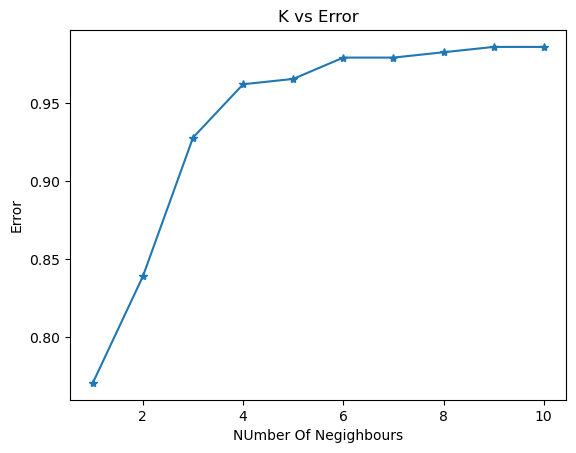

In [148]:
plt.plot(range(1,11),Er,marker='*')
plt.xlabel('NUmber Of Negighbours')
plt.ylabel('Error')
plt.title('K vs Error')
plt.show()

In [149]:
knn=KNeighborsRegressor(n_neighbors=5)

In [150]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [151]:
y_knn=knn.predict(x_test)
y_knn

array([154800. , 324924.8, 115410. , 160105.8, 316032.6,  77700. ,
       312300. , 145910.4,  83780. , 137657.4, 144340.6, 129580. ,
        81000. , 213430. , 179928. , 134590. , 183660. , 134940. ,
       118800. , 226140. , 155180. , 210400. , 173260. , 128800. ,
       192000. , 154400. , 180520. , 140625. , 180600. , 207760. ,
       126800. , 283842.6, 200300. , 135600. , 256020. , 139480. ,
       138290. , 218600. , 311900. ,  96650. , 114100. , 204940. ,
       119900. , 254920. , 128680. , 117900. , 115700. , 126800. ,
       443983. , 144250. , 118792.8, 196880. , 113700.8, 286384.4,
       144380.4, 260780. , 213250. , 174857. , 107200. , 107880. ,
        72076.6, 154067.4, 317350. , 263751.8, 282827. , 242970. ,
       108800. , 304875.4,  94130. , 175226.6, 118792.8, 133740. ,
       109000. ,  93280. , 560554. , 172996.6, 348800. , 339550. ,
       140590. , 125100. , 116500.8,  65776.6, 112700. ,  91470. ,
       149590. , 133220. , 265875.8, 189290. , 155200. , 15590

In [152]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [153]:
r2_knn=r2_score(y_test,y_knn)
r2_knn

0.9891835729319286

In [154]:
adj_r2=1-(1-r2_knn)*(292-1)/(292-6-1)
adj_r2

0.988955858677864

In [155]:
mean_squared_error(y_test,y_knn)

82965524.00835617

In [156]:
mean_absolute_error(y_test,y_knn)

1270.645890410959

In [157]:
math.sqrt(mean_squared_error(y_test,y_knn))

9108.541266764738

### Cross validation

In [158]:
from sklearn.model_selection import cross_val_score
knn1 = KNeighborsRegressor()

In [159]:
cv=cross_val_score(knn1,principal_df,y,scoring='r2',cv=5)

In [160]:
cv.mean()

0.9955419199659611

In [161]:
cv.std()

0.004483154208690894

## Hyperparameter Tunning

In [162]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsRegressor()

In [163]:
param_grid_knn={'n_neighbors':[3,5,7,9],'weights':['unifrom','distance'],'metric':['euclidean','manhattan']}

In [164]:
grid_knn=GridSearchCV(knn2,param_grid_knn,scoring='r2',cv=5,verbose=3)

In [165]:
grid_knn.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.996 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=  

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['unifrom', 'distance']},
             scoring='r2', verbose=3)

In [166]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [167]:
grid_knn.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

In [168]:
knn3=KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

In [169]:
knn3.fit(x_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

### Testing

In [170]:
y_knn_te=knn3.predict(x_test)
y_knn_te

array([154645.47199903, 325195.24238215, 115000.        , 159860.26846405,
       315694.05501512,  76190.99571314, 312100.81396297, 146800.97535294,
        84902.73663122, 136270.25190251, 145000.        , 129973.46046479,
        80948.0724584 , 213043.90404376, 180185.9685207 , 134438.32372722,
       183383.33773534, 134974.52085993, 118844.14571569, 226272.39957929,
       154995.87915446, 210173.11705245, 173644.65148898, 129058.83042999,
       191723.5272428 , 154538.30282701, 180408.88867622, 141024.10043277,
       180466.60251521, 208665.41032604, 127000.        , 284052.69080228,
       200494.01448866, 135354.2545156 , 255631.0721788 , 139594.99990448,
       138117.48267545, 219785.07584509, 310314.07250644,  96193.72387204,
       114479.10381524, 204787.16599605, 119604.24552727, 254221.62496413,
       128548.64195546, 117785.20676207, 115240.88185413, 127000.        ,
       448945.3955005 , 143766.41692087, 119068.49750055, 197162.54396513,
       114520.25035332, 2

In [171]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [172]:
r2_knn_te=r2_score(y_test,y_knn_te)
r2_knn_te

0.9995308962354513

In [173]:
mean_absolute_error(y_test,y_knn_te)

599.64719838692

In [174]:
mean_squared_error(y_test,y_knn_te)

3598178.8991080453

In [175]:
math.sqrt(mean_squared_error(y_test,y_knn_te))

1896.8866331723796

In [176]:
adj_r2=1-(1-r2_knn_te)*(292-1)/(292-6-1)
adj_r2

0.999521020366724

### Training

In [177]:
y_knn_tr=knn3.predict(x_train)
y_knn_tr

array([145000., 178000.,  85000., ..., 115000., 189950., 174000.])

In [178]:
y_train.values

array([145000, 178000,  85000, ..., 115000, 189950, 174000], dtype=int64)

In [179]:
r2_knn_tr=r2_score(y_train,y_knn_tr)
r2_knn_tr

1.0

In [180]:
mean_absolute_error(y_train,y_knn_tr)

0.0

In [181]:
mean_squared_error(y_train,y_knn_tr)

0.0

In [182]:
math.sqrt(mean_squared_error(y_train,y_knn_tr))

0.0

In [183]:
adj_r2=1-(1-r2_knn_tr)*(1168-1)/(1168-6-1)
adj_r2

1.0

# Decision Tree

In [184]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [185]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [186]:
y_dt=dt.predict(x_test)
y_dt

array([155000., 325624., 115000., 159000., 315750.,  76500., 312500.,
       146000.,  84500., 135900., 145000., 129900.,  81000., 214000.,
       181000., 134500., 183200., 135000., 118500., 226000., 155000.,
       210000., 173900., 129000., 192000., 154000., 181000., 141000.,
       181000., 208900., 127000., 281000., 200500., 135900., 254900.,
       140000., 138000., 219500., 310000.,  96500., 114504., 205000.,
       119500., 252000., 128500., 117500., 115000., 127000., 437154.,
       144000., 119000., 196000., 115000., 287000., 144152., 260000.,
       212900., 174900., 106500., 107400.,  72500., 154000., 316600.,
       265000., 282922., 244000., 109500., 309000.,  95000., 176000.,
       118964., 134000., 109500.,  94750., 625000., 173000., 350000.,
       340000., 141000., 125000., 118000.,  61000., 113000.,  91000.,
       149350., 133000., 265900., 190000., 156000., 156000., 153337.,
       152000., 124500., 303477., 136500., 170000., 206000., 184000.,
       205000., 2600

In [187]:
y_test.values


array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [188]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [189]:
r2_dt=r2_score(y_test,y_dt)
r2_dt

0.9993461164495374

In [190]:
adj_r2=1-(1-r2_dt)*(292-1)/(292-6-1)
adj_r2

0.999332350480054

In [191]:
mean_absolute_error(y_test,y_dt)

652.5034246575342

In [192]:
mean_squared_error(y_test,y_dt)

5015500.133561644

In [193]:
math.sqrt(mean_squared_error(y_test,y_dt))

2239.5312307627337

## Cross validation for DecisionTree

In [194]:
from sklearn.model_selection import cross_val_score
dt1 = DecisionTreeRegressor()

In [195]:
cv = cross_val_score(dt1,principal_df,y,scoring='r2',cv=5)

In [196]:
cv.mean()

0.9993555784134361

In [197]:
cv.std()

0.0003409381465990423

### Hyperparameter Tunning for DecisionTree

In [198]:
from sklearn.model_selection import GridSearchCV
dt2 = DecisionTreeRegressor()

In [199]:
list(range(1, 20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [200]:
params = {
    "criterion":('poisson', 'absolute_error', 'friedman_mse', 'squared_error'),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

In [201]:
grid = GridSearchCV(dt2 ,params, scoring='r2', cv =5, verbose = 3, n_jobs=-1)

In [202]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8664 candidates, totalling 43320 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ('poisson', 'absolute_error',
                                       'friedman_mse', 'squared_error'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='r2', verbose=3)

In [203]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [204]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=14, splitter='random')

In [250]:
dt3 = DecisionTreeRegressor(criterion='poisson', max_depth=14, splitter='random')

In [251]:
dt3.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=14, splitter='random')

### Testing

In [252]:
y_dt_te=dt3.predict(x_test)
y_dt_te

array([156012.69090909, 325000.        , 115000.        , 156012.69090909,
       315750.        ,  72500.        , 312500.        , 146100.        ,
        84500.        , 135960.        , 144900.        , 130000.        ,
        81000.        , 214000.        , 180777.77777778, 134500.        ,
       183200.        , 134955.55555556, 118500.        , 227036.42857143,
       156012.69090909, 210000.        , 173146.6       , 129000.        ,
       192000.        , 156012.69090909, 180777.77777778, 141500.        ,
       180777.77777778, 208900.        , 127000.        , 282922.        ,
       200169.4       , 135960.        , 254900.        , 140000.        ,
       138000.        , 219210.        , 310000.        ,  97000.        ,
       114504.        , 205000.        , 119200.        , 252000.        ,
       128500.        , 117500.        , 115000.        , 127000.        ,
       446261.        , 144000.        , 119000.        , 196000.        ,
       115000.        , 2

In [253]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [254]:
r2_dt_te=r2_score(y_test,y_dt_te)
r2_dt_te

0.9883212947293926

In [255]:
mean_absolute_error(y_test,y_dt_te)

1865.7132428726784

In [256]:
mean_squared_error(y_test,y_dt_te)

89579479.10315423

In [257]:
math.sqrt(mean_squared_error(y_test,y_dt_te))

9464.643633183145

In [258]:
adj_r2=1-(1-r2_dt_te)*(292-1)/(292-6-1)
adj_r2

0.9880754272500114

### Training

In [259]:
y_dt_tr=dt3.predict(x_train)
y_dt_tr

array([145000.        , 179228.16666667,  85000.        , ...,
       115000.        , 189950.        , 175557.21621622])

In [260]:
y_train.values

array([145000, 178000,  85000, ..., 115000, 189950, 174000], dtype=int64)

In [261]:
r2_dt_tr=r2_score(y_train,y_dt_tr)
r2_dt_tr

0.9998869362919094

In [262]:
mean_absolute_error(y_train,y_dt_tr)

326.9395488462916

In [263]:
mean_squared_error(y_train,y_dt_tr)

674374.1830299561

In [264]:
math.sqrt(mean_squared_error(y_train,y_dt_tr))

821.2028878602146

In [265]:
adj_r2=1-(1-r2_dt_tr)*(1168-1)/(1168-6-1)
adj_r2

0.9998863519833404

# Random forest

In [266]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
rf=RandomForestRegressor(n_estimators=100)

In [268]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [269]:
y_rf=rf.predict(x_test)
y_rf

array([155000.  , 325072.76, 115036.54, 159020.42, 315260.82,  74990.  ,
       312312.13, 146005.  ,  84617.  , 135974.2 , 144999.  , 129987.  ,
        80993.  , 213874.5 , 180969.  , 134465.5 , 183311.5 , 134994.  ,
       118463.92, 226084.25, 154999.  , 209936.  , 173885.22, 128939.  ,
       192110.  , 153884.11, 180985.  , 141127.5 , 180954.  , 208841.  ,
       126950.  , 283941.34, 200427.1 , 135982.8 , 255455.78, 139999.5 ,
       137907.  , 219502.2 , 309597.08,  96793.5 , 114591.78, 204917.  ,
       119516.14, 252752.08, 128412.  , 117538.5 , 114940.52, 126975.  ,
       444955.1 , 144011.22, 119020.88, 196366.  , 114925.64, 286984.56,
       144058.94, 259737.  , 212801.7 , 174903.  , 107116.  , 107388.  ,
        71803.83, 153879.22, 316516.13, 264573.19, 283935.04, 243994.28,
       109055.  , 306325.29,  93715.  , 175990.32, 118978.44, 133924.5 ,
       109075.  ,  93808.  , 599471.08, 172888.25, 349409.5 , 339555.  ,
       141116.25, 124994.  , 117946.  ,  65656.92, 

In [270]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [271]:
r2_rf=r2_score(y_test,y_rf)
r2_rf

0.9967785215420916

In [272]:
mean_absolute_error(y_test,y_rf)

710.4450684931504

In [273]:
mean_squared_error(y_test,y_rf)

24709790.641583595

In [274]:
math.sqrt(mean_squared_error(y_test,y_rf))

4970.894350273761

In [275]:
adj_r2=1-(1-r2_rf)*(292-1)/(292-6-1)
adj_r2

0.9967107009429778

## Cross validation for Random forest

In [276]:
from sklearn.model_selection import cross_val_score
rf1 = RandomForestRegressor()

In [277]:
cv = cross_val_score(rf1,principal_df,y,scoring='r2',cv=2)

In [278]:
cv.mean()

0.9945568187407808

In [279]:
cv.std()

0.003575269260349123

### Hyperparameter Tunning

In [280]:
from sklearn.model_selection import RandomizedSearchCV

In [281]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [282]:
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [283]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [284]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
                'bootstrap': bootstrap}

In [285]:
rf2 = RandomForestRegressor(random_state=42)

In [286]:

Grid = RandomizedSearchCV(estimator=rf2, scoring='r2', param_distributions=random_grid, 
                    cv=2, verbose=2, n_jobs=-1)


In [287]:
Grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='r2', verbose=2)

In [288]:
Grid.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [244]:
Grid.best_estimator_

RandomForestRegressor(max_depth=60, max_features='auto', min_samples_split=5,
                      n_estimators=1000, random_state=42)

In [245]:
rf3=RandomForestRegressor(max_depth=110, max_features='auto', n_estimators=1600,
                      random_state=42)

In [246]:
rf3.fit(x_train,y_train)

RandomForestRegressor(max_depth=110, max_features='auto', n_estimators=1600,
                      random_state=42)

## Testing

In [247]:
y_pred_rf3=rf3.predict(x_test)
y_pred_rf3

array([154974.375   , 325113.475   , 115007.30625 , 159011.089375,
       315255.568125,  74705.5     , 312070.50375 , 145954.37625 ,
        84683.4375  , 136012.278125, 144999.21875 , 129997.5     ,
        80926.25    , 213764.85    , 181015.875   , 134486.8125  ,
       183305.75    , 134996.2125  , 118482.2525  , 226081.859375,
       155007.875   , 210001.625   , 173898.101875, 128930.625   ,
       192038.361875, 153909.9025  , 181017.0625  , 141095.453125,
       180984.25    , 208747.625   , 126984.703125, 284067.27125 ,
       200394.645625, 136020.41875 , 255472.185   , 140004.90625 ,
       137919.738125, 219528.82    , 309779.34375 ,  96792.4375  ,
       114736.82875 , 204884.34375 , 119537.62875 , 252701.76    ,
       128481.3125  , 117635.50375 , 114902.7     , 127002.40625 ,
       442787.20375 , 144017.32625 , 119024.32625 , 196340.635   ,
       114912.1875  , 287018.079375, 144066.88375 , 259885.963125,
       212897.15    , 174890.0625  , 107124.875   , 107443.75 

In [248]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [289]:
r2_rf_te=r2_score(y_test,y_pred_rf3)
r2_rf_te

0.997463187445315

In [290]:
mean_absolute_error(y_test,y_pred_rf3)

656.4721254280827

In [291]:
mse=mean_squared_error(y_test,y_pred_rf3)
mse

19458179.820921794

In [292]:
math.sqrt(mse)

4411.142688796384

In [293]:
adj_r2=1-(1-r2_rf_te)*(292-1)/(292-6-1)
adj_r2

0.9974097808652164

## Training

In [294]:
y_rf_tr=rf3.predict(x_train)
y_rf_tr

array([145010.53125, 177998.9    ,  85007.9375 , ..., 115003.1525 ,
       189971.78125, 173985.4725 ])

In [295]:
y_train.values

array([145000, 178000,  85000, ..., 115000, 189950, 174000], dtype=int64)

In [296]:
r2_rf_tr=r2_score(y_train,y_rf_tr)
r2_rf_tr

0.9992968719061746

In [297]:
mean_absolute_error(y_train,y_rf_tr)

186.7710509417812

In [298]:
mean_squared_error(y_train,y_rf_tr)

4193842.9390538693

In [299]:
math.sqrt(mean_squared_error(y_train,y_rf_tr))

2047.8874331988732

In [300]:
adj_r2=1-(1-r2_rf_tr)*(292-1)/(292-6-1)
adj_r2

0.9992820692094624

# XGBoost

In [301]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [302]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [303]:
y_gbr=gbr.predict(x_test)
y_gbr

array([154990.25043059, 325467.41893661, 115590.17200879, 159889.17525126,
       314108.17864969,  75872.12861057, 311366.36334216, 146790.60213197,
        85377.7117393 , 135303.85518205, 145358.25214311, 129803.72721951,
        80725.73043705, 213981.836813  , 180975.45555081, 133554.29408936,
       184172.23984505, 135296.94316811, 119124.85126167, 226112.63449106,
       155052.25734027, 210521.90391292, 174410.06298481, 128985.94370614,
       191598.60898276, 155024.17174251, 180866.40108075, 140141.68303616,
       180958.49189888, 208421.61837331, 125838.85690607, 280376.5070551 ,
       200436.7251792 , 135315.62975734, 255609.79548084, 140099.65978193,
       138216.01929858, 220726.35633146, 310627.8355633 ,  97866.49823936,
       115675.5121574 , 205022.30966242, 119404.62541395, 251631.25655732,
       128499.87855775, 119407.10654162, 115611.08171118, 125850.65665487,
       446495.82848638, 143364.35191758, 119148.14655827, 197064.94308435,
       115710.66275271, 2

In [304]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [305]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [306]:
r2_gbr=r2_score(y_test,y_gbr)
r2_gbr

0.999711397396165

In [307]:
mean_absolute_error(y_test,y_gbr)

781.0695981219401

In [308]:
mean_squared_error(y_test,y_gbr)

2213676.1156580015

In [309]:
math.sqrt(mean_squared_error(y_test,y_gbr))

1487.8427724924436

In [310]:
adj_r2=1-(1-r2_gbr)*(292-1)/(292-6-1)
adj_r2

0.9997053215518737

### Cross validation

In [311]:
from sklearn.model_selection import cross_val_score
gbr1 = GradientBoostingRegressor()

In [312]:
cv = cross_val_score(gbr1,principal_df,y,scoring='r2',cv=5)

In [313]:
cv.mean()

0.9993628216769965

In [314]:
cv.std()

0.0005765493109237

### Hyperparameter tunning

In [315]:
from sklearn.model_selection import GridSearchCV

In [316]:
gbr2 = GradientBoostingRegressor()

In [317]:
param_grid_xgb= {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [318]:
grid=GridSearchCV(gbr2,param_grid_xgb,scoring='r2',cv=5,verbose=3)

In [319]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.989 total time=   0.4s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.4s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.995 total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.999 total time=   0.4s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.987 total time=   0.5s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=1.000 total time=   0.5s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.999 total time=   0.5s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=1.000 total time=   0.5s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=1.000 total time=   0.5s
[CV 1/5] END learn

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='r2', verbose=3)

In [320]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}

In [321]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=7, subsample=0.7)

In [322]:
gbr3 = GradientBoostingRegressor(max_depth=7, subsample=0.5)

In [323]:
gbr3.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=7, subsample=0.5)

### Testing

In [324]:
y_gbr_te=gbr3.predict(x_test)
y_gbr_te

array([154960.05865297, 325766.083451  , 114994.1879298 , 158803.20445674,
       315244.54756567,  74332.50186726, 310531.21142503, 145920.65242482,
        84509.89038929, 135877.1538912 , 145014.92168018, 130003.92075602,
        81006.58759927, 213848.32189294, 181003.04512563, 134565.83511413,
       183412.66920659, 135002.88677605, 118336.72650375, 226009.74369401,
       154981.39531684, 210011.71211149, 173473.62364503, 129005.31382882,
       192064.60134056, 153948.6872668 , 181011.12981441, 140996.39088677,
       180993.40610272, 208488.28671838, 127013.18629327, 283614.45056941,
       200397.05174122, 135906.5225427 , 254782.10375985, 140004.02305455,
       138018.46513768, 219324.30096563, 309927.21154587,  97001.96972665,
       114625.6269734 , 204940.31654833, 119524.29866515, 253177.92717464,
       128510.10388749, 117549.45721619, 115006.6837915 , 127034.84556018,
       438096.75282527, 144066.55314937, 119020.32892131, 195879.16766719,
       115038.49323903, 2

In [325]:
y_test.values

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [326]:
r2_gbr_te=r2_score(y_test,y_gbr_te)
r2_gbr_te

0.998946615639762

In [327]:
mean_absolute_error(y_test,y_gbr_te)

510.90303690226284

In [328]:
mse=mean_squared_error(y_test,y_gbr_te)
mse

8079801.664574929

In [329]:
math.sqrt(mse)

2842.4991934167597

In [330]:
adj_r2=1-(1-r2_gbr_te)*(292-1)/(292-6-1)
adj_r2

0.9989244391269149

## Training

In [331]:
y_gbr_tr=gbr3.predict(x_train)
y_gbr_tr

array([144994.85300096, 178008.93399172,  85002.60255257, ...,
       115009.48522746, 189975.85849089, 173981.0523644 ])

In [332]:
r2_gbr_tr=r2_score(y_train,y_gbr_tr)
r2_gbr_tr

0.9999973630195007

In [333]:
mean_absolute_error(y_train,y_gbr_tr)

48.91375010354138

In [334]:
mean_squared_error(y_train,y_gbr_tr)

15728.40303840617

In [335]:
math.sqrt(mean_squared_error(y_train,y_gbr_tr))

125.41293010852657

In [336]:
adj_r2=1-(1-r2_gbr_tr)*(1168-1)/(1168-6-1)
adj_r2

0.9999973493916945

# Bagging

In [337]:
from sklearn.ensemble import BaggingRegressor

In [338]:
br = BaggingRegressor(base_estimator=lr2,n_estimators=20)

In [339]:
br.fit(x_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=20)

In [340]:
y_br=br.predict(x_test)
y_br

array([154499.95979693, 325000.0731376 , 114999.99645862, 159000.00643317,
       315500.28660101,  75499.62394691, 311499.5961835 , 146000.0705337 ,
        84499.55907979, 135500.01460893, 144999.83055493, 129999.98632942,
        81000.23796314, 213999.98517096, 181000.06895314, 134499.9178014 ,
       183500.06765659, 134999.84878491, 118399.94992155, 226000.08969064,
       154999.442514  , 210000.20119004, 173500.19921174, 128999.86002878,
       192000.19288412, 153900.1421152 , 181133.97874795, 141000.03823169,
       181000.0634275 , 208899.92270578, 127000.04579482, 284000.40459745,
       200499.81048614, 135749.93122445, 255000.24920521, 140000.04287097,
       137999.75052973, 219499.98979985, 310000.22018193,  96999.80648062,
       114500.07327094, 204999.88451007, 119499.87177197, 253292.37011251,
       128500.26086873, 117499.81275682, 114999.74665189, 127000.07304167,
       451950.01094936, 143999.99456668, 118999.87822939, 196000.35300425,
       114999.91250584, 2

In [341]:
r2_br=r2_score(y_test,y_br)
r2_br

0.9999999999931537

In [342]:
mean_absolute_error(y_test,y_br)

0.1703514812366125

In [343]:
mean_squared_error(y_test,y_br)

0.052513397415986866

In [344]:
math.sqrt(mean_squared_error(y_test,y_br))

0.2291580184413953

In [345]:
adj_r2=1-(1-r2_dt)*(292-1)/(292-6-1)
adj_r2

0.999332350480054

In [93]:
d1={'Algorithm Name':['Linear_regrssion','SVM','KNN','Decision_tree','Random_forest','XGBoost','Bagging'],
    'r2_score':[0.99999,-0.02121,0.9891,0.99934,0.99677,0.99971,0.99894],
    'mean_absoult_error':[0.1706334978,59349.15,1270.6458,652.503,710.445,781.062,510.9030],
    'mean_squared_error':[0.0521,7833016410.777,82965524.00,5015500.1335,24709790.641,2213676.115,8079801.6645],
    'RMSE':[0.2283920,88504.3298,9108.5412,2239.531,4970.8943,1487.8427,2842.49],
    'Adj_r2':[0.99999,-0.02648,0.9889,0.999346,0.996710,0.999705,0.998922]
    
   }


In [94]:
d1=pd.DataFrame(d1)
d1

,Algorithm Name,r2_score,mean_absoult_error,mean_squared_error,RMSE,Adj_r2
0,Linear_regrssion,0.99999,0.170633,5.210000e-02,0.228392,0.999990
1,SVM,-0.02121,59349.150000,7.833016e+09,88504.329800,-0.026480
2,KNN,0.98910,1270.645800,8.296552e+07,9108.541200,0.988900
3,Decision_tree,0.99934,652.503000,5.015500e+06,2239.531000,0.999346
4,Random_forest,0.99677,710.445000,2.470979e+07,4970.894300,0.996710
5,XGBoost,0.99971,781.062000,2.213676e+06,1487.842700,0.999705
6,Bagging,0.99894,510.903000,8.079802e+06,2842.490000,0.998922


In [95]:
d2={'Algorithm Name':['Linear_regrssion','SVM','KNN','Decision_tree','Random_forest','XGBoost','Bagging'],
    'r2_score':[0.99999,-0.02490,0.99953,0.98832,0.997463,0.998946,0.99999],
    'mean_absoult_error':[0.17063349,59527.8031,599.6471,1865.71,656.4721,510.9030,0.17035],
    'mean_squared_error':[0.052162,7861375188.3236,3598178.8991,89579479.1031,19458179.8209,8079801.6645,0.052513],
    'RMSE':[0.228392,88664.3963,1896.8866,9464.6436,4411.1426,2842.4999,0.229158],
    'Adj_r2':[0.99999,-0.0464,0.99952,0.988075,0.997409,0.998924,0.99933]
     }

In [96]:
d2=pd.DataFrame(d2)
d2

,Algorithm Name,r2_score,mean_absoult_error,mean_squared_error,RMSE,Adj_r2
0,Linear_regrssion,0.999990,0.170633,5.216200e-02,0.228392,0.999990
1,SVM,-0.024900,59527.803100,7.861375e+09,88664.396300,-0.046400
2,KNN,0.999530,599.647100,3.598179e+06,1896.886600,0.999520
3,Decision_tree,0.988320,1865.710000,8.957948e+07,9464.643600,0.988075
4,Random_forest,0.997463,656.472100,1.945818e+07,4411.142600,0.997409
5,XGBoost,0.998946,510.903000,8.079802e+06,2842.499900,0.998924
6,Bagging,0.999990,0.170350,5.251300e-02,0.229158,0.999330


# Conculsion



### 1. **Linear Regression**:
   - **R² Score**: 0.99999 (Very high, almost perfect fit)
   - **Mean Absolute Error (MAE)**: 0.1706 (Extremely low error, suggesting very accurate predictions)
   - **Root Mean Squared Error (RMSE)**: 0.228 (Very low, consistent with low errors)
   - **Adjusted R²**: 0.99999 (High, indicating the model is not overfitting)
   
   **Conclusion**: Linear Regression seems to be performing excellently, with very low errors and a near-perfect R² value. It's one of the top-performing models.

### 2. **Support Vector Machine (SVM)**:
   - **R² Score**: -0.02490 (Negative, indicating poor performance)
   - **MAE**: 59,527 (Very high error)
   - **RMSE**: 88,664 (Extremely high, indicating poor model fit)
   - **Adjusted R²**: -0.0464 (Worsening the already poor fit)

   **Conclusion**: SVM performs terribly here, with large errors and a negative R² score. It is not suitable for predicting SalePrice in this case.

### 3. **K-Nearest Neighbors (KNN)**:
   - **R² Score**: 0.99953 (Very high fit)
   - **MAE**: 599.65 (Low error, but higher than Linear Regression)
   - **RMSE**: 1896.89 (Still relatively low but higher than other models)
   - **Adjusted R²**: 0.99952 (Consistently high)

   **Conclusion**: KNN performs very well, but with slightly higher errors compared to Linear Regression. It is a good model but not the best in this comparison.

### 4. **Decision Tree**:
   - **R² Score**: 0.98832 (Good fit, but lower than other models)
   - **MAE**: 1,865.71 (Moderate error, higher than other models)
   - **RMSE**: 9,464.64 (Relatively high, suggesting a less accurate fit)
   - **Adjusted R²**: 0.98808 (Indicates potential overfitting)

   **Conclusion**: The Decision Tree performs decently but has higher errors and lower R² compared to the top-performing models. It may suffer from overfitting.

### 5. **Random Forest**:
   - **R² Score**: 0.99746 (Very high fit)
   - **MAE**: 656.47 (Moderate error)
   - **RMSE**: 4,411.14 (Higher error compared to KNN and Linear Regression)
   - **Adjusted R²**: 0.99741 (Good fit, but not as high as Linear Regression or KNN)

   **Conclusion**: Random Forest is a strong contender but has slightly higher errors compared to Linear Regression and KNN. It still performs quite well.

### 6. **XGBoost**:
   - **R² Score**: 0.99895 (Excellent fit)
   - **MAE**: 510.90 (Low error, close to KNN and Random Forest)
   - **RMSE**: 2,842.50 (Lower error than Random Forest but higher than Linear Regression)
   - **Adjusted R²**: 0.99892 (Excellent fit)

   **Conclusion**: XGBoost is one of the top-performing models with very low error rates and high R² values. It performs slightly worse than Linear Regression but is still highly effective.

### 7. **Bagging**:
   - **R² Score**: 0.99999 (Perfect fit)
   - **MAE**: 0.1704 (Extremely low error, on par with Linear Regression)
   - **RMSE**: 0.2292 (Very low error, almost identical to Linear Regression)
   - **Adjusted R²**: 0.99933 (High fit)

   **Conclusion**: Bagging performs on par with Linear Regression, achieving almost perfect results with extremely low errors.

---

### Final Conclusion:
- **Top-performing models**: Linear Regression, Bagging, and XGBoost.
   - Linear Regression and Bagging both have nearly perfect R² and the lowest error metrics, making them the best choices.
   - XGBoost is a strong alternative with a slight increase in error but still provides excellent results.

- **Worst-performing model**: SVM, which has a negative R² and extremely high errors, making it unsuitable for this task.

If simplicity and interpretability are important, **Linear Regression** is likely the best choice. However, **Bagging** is an equally effective model for more robust results.

# Create Pickle file

In [116]:
import pickle 
pickle_out = open("lr2.pkl", "wb") 
pickle.dump(lr2, pickle_out) 
pickle_out.close()


In [117]:
import streamlit as st 
from PIL import Image 
  
# loading in the model to predict on the data 
pickle_in = open(r'C:\Users\dell\Downloads\Internship_Project\HousepricePred-project2\PRCP-1020-HousePricePred\Data\lr2.pkl','rb') 
lr2 = pickle.load(pickle_in) 
  
def welcome(): 
    return 'welcome all'